# ***An Analysis of Popular Cryptocurrencies***
*An in-depth analysis of Popular Crypocurrencies sold on Robinhood by Ali-Reza Rizwani*


---

###***Introduction***###
*Cryptocurrency, what is it?*

*We've all heard of [Cryptocurrency](https://www.forbes.com/advisor/investing/what-is-cryptocurrency/) and the prevelant Bitcoin... But what is it?  Cryptocurrency is an online currency that utilizes a technology called [blockchain](https://www.investopedia.com/terms/b/blockchain.asp). Simply put, it's a online money. Now, what makes this soo attractive to investors and consumers alike? Well, similar to a mixture of the stock market and cash, it's got the best of both worlds. It can be used as currency and still has returns like the stock market. Now, what are the drawbacks? And I can only find one... **VOLATILITY**.* 

*Now, our goal is to expose that one drawback and use it to our advantage, we will try and observe the crypto market over the past couple of years and develop a trading method proved by machine learning, complex algorithms, and math. From this, we will choose which method is best for us to pursue to make the highest amount of capital gain. The question we are trying to answer is, can we utilize our data analysis to capitalize on the volatility of the cryptocurrencies?*


**This project is in not meant as financial advice nor should it be taken as such*

***The [link](https://www.forbes.com/advisor/investing/what-is-cryptocurrency/) about Cryptocurrencies is really good*

****Reproducing any code or formulas derived by me should first seek permission*

In [1]:
# Importing needed libraries

import numpy as np
import pandas as pd
import sklearn
import datetime
import io
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


***Data Curation***

*We will be importing 4 different CSV files with a lot of historical data about their respective coins. Keep in mind that the data does not include all of 2021 nor all the data that a normal trader would have. We have much less data and because of that some estimations and a lot of calculations will take place. The 4 coins chosen are my favorite and most popular/known cryptocurrencies sold on [Robinhood](https://robinhood.com) including:*

Bitcoin (BTC)

Dogecoin (DOGE)

Litecoin (LTC)

Ethereum (ETH)



*We have downloaded the datasets from [Kaggle](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Dogecoin.csv) curated by [SRK](https://www.kaggle.com/sudalairajkumar) which was accessed on the 18th of December, 2021.*

*[If you would like to join Robinhood please use this link](https://join.robinhood.com/alirezr58)*


DATSET: (https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Dogecoin.csv)




In [2]:
#upload files
from google.colab import files
dataupload = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin.csv
Saving coin_Dogecoin.csv to coin_Dogecoin.csv
Saving coin_Ethereum.csv to coin_Ethereum.csv
Saving coin_Litecoin.csv to coin_Litecoin.csv


In [3]:
BTC_DF = pd.read_csv("coin_Bitcoin.csv")
BTC_DF.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
DOGE_DF = pd.read_csv("coin_Dogecoin.csv")
DOGE_DF.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [5]:
ETH_DF = pd.read_csv("coin_Ethereum.csv")
ETH_DF.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [6]:
LTC_DF = pd.read_csv("coin_Litecoin.csv")
LTC_DF.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


*Now with a quick glance at the datasets, we can see that we can make some improvements by modifying them. The first couple of modifications would be to delete columns SNo (basically the index), Name (has a symbol), and deleting the volume. This is because for our purposes volume will not be that significant and we can see that it is only populated for Ethereum.*


In [7]:
BTC_DF = BTC_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']]
BTC_DF.columns = ['Symbol', 'OG Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']
DOGE_DF = DOGE_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']]
DOGE_DF.columns = ['Symbol', 'OG Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']
ETH_DF = ETH_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']]
ETH_DF.columns = ['Symbol', 'OG Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']
LTC_DF = LTC_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']]
LTC_DF.columns = ['Symbol', 'OG Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']


*Next we shall only include the date and sort by descending order*

In [8]:
temp = BTC_DF['OG Date'].str.split(" ", n = 1, expand = True)
BTC_DF['Date']= temp[0] #Add
BTC_DF.drop(columns=['OG Date']) #Drop
BTC_DF = BTC_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']] #Reorder
#BTC_DF = BTC_DF.sort_values(by=['Date'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
temp = DOGE_DF['OG Date'].str.split(" ", n = 1, expand = True)
DOGE_DF['Date']= temp[0] #Add
DOGE_DF.drop(columns=['OG Date']) #Drop
DOGE_DF = DOGE_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']] #Reorder
#DOGE_DF = DOGE_DF.sort_values(by=['Date'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
temp = ETH_DF['OG Date'].str.split(" ", n = 1, expand = True)
ETH_DF['Date']= temp[0] #Add
ETH_DF.drop(columns=['OG Date']) #Drop
ETH_DF = ETH_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']] #Reorder
#ETH_DF = ETH_DF.sort_values(by=['Date'], ascending=False)

In [11]:
temp = LTC_DF['OG Date'].str.split(" ", n = 1, expand = True)
LTC_DF['Date']= temp[0] #Add
LTC_DF.drop(columns=['OG Date']) #Drop
LTC_DF = LTC_DF[['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Marketcap']] #Reorder
#LTC_DF = LTC_DF.sort_values(by=['Date'], ascending=False)

In [12]:
# reindex
BTC_DF = BTC_DF.reset_index(drop=True)
DOGE_DF = DOGE_DF.reset_index(drop=True)
ETH_DF = ETH_DF.reset_index(drop=True)
LTC_DF = LTC_DF.reset_index(drop=True)

In [13]:
#Create new row average calculated by open+close/2 (not the most accurate)
BTC_DF['Average'] = (BTC_DF['Open'] + BTC_DF['Close'])/2
DOGE_DF['Average'] = (DOGE_DF['Open'] + DOGE_DF['Close'])/2
ETH_DF['Average'] = (ETH_DF['Open'] + ETH_DF['Close'])/2
LTC_DF['Average'] = (LTC_DF['Open'] + LTC_DF['Close'])/2


*Now that we have perfected all the dataframes (we do not have any missing data), we may create a large dataframe that contains all four of our cryptocurrencies*

In [14]:
crypto_DF = BTC_DF.append(DOGE_DF).append(ETH_DF).append(LTC_DF).sort_values(by=['Date'], ascending=False)
crypto_DF = crypto_DF.reset_index(drop=True)

*Here is the final results of out data scraping, cleaning, and improvement:*

In [15]:
#Bitcoin
BTC_DF.head(10)

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,1.603769e+09,139.491997
1,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,1.542813e+09,141.500000
2,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,1.298955e+09,127.994999
3,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,1.168517e+09,110.794998
4,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,1.085995e+09,102.000000
5,BTC,2013-05-04,115.000000,92.500000,98.099998,112.500000,1.250317e+09,105.299999
6,BTC,2013-05-05,118.800003,107.142998,112.900002,115.910004,1.288693e+09,114.405003
7,BTC,2013-05-06,124.663002,106.639999,115.980003,112.300003,1.249023e+09,114.140003
8,BTC,2013-05-07,113.444000,97.699997,112.250000,111.500000,1.240594e+09,111.875000
9,BTC,2013-05-08,115.779999,109.599998,109.599998,113.566002,1.264049e+09,111.583000


In [16]:
#Dogecoin
DOGE_DF.head(10)

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,DOGE,2013-12-16,0.000866,0.000150,0.000299,0.000205,1.509085e+06,0.000252
1,DOGE,2013-12-17,0.000289,0.000116,0.000207,0.000269,2.169688e+06,0.000238
2,DOGE,2013-12-18,0.000362,0.000205,0.000267,0.000362,3.188943e+06,0.000314
3,DOGE,2013-12-19,0.001520,0.000328,0.000395,0.001162,1.115034e+07,0.000779
4,DOGE,2013-12-20,0.001143,0.000662,0.001143,0.000704,7.284337e+06,0.000923
5,DOGE,2013-12-21,0.000700,0.000354,0.000700,0.000394,4.360316e+06,0.000547
6,DOGE,2013-12-22,0.000498,0.000280,0.000391,0.000315,3.706592e+06,0.000353
7,DOGE,2013-12-23,0.000460,0.000294,0.000313,0.000451,5.644793e+06,0.000382
8,DOGE,2013-12-24,0.000913,0.000450,0.000450,0.000686,9.075938e+06,0.000568
9,DOGE,2013-12-25,0.000694,0.000558,0.000686,0.000587,8.194483e+06,0.000636


In [17]:
#Ethereum 
ETH_DF.head(10)

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,ETH,2015-08-08,2.798810,0.714725,2.793760,0.753325,4.548689e+07,1.773543
1,ETH,2015-08-09,0.879810,0.629191,0.706136,0.701897,4.239957e+07,0.704017
2,ETH,2015-08-10,0.729854,0.636546,0.713989,0.708448,4.281836e+07,0.711219
3,ETH,2015-08-11,1.131410,0.663235,0.708087,1.067860,6.456929e+07,0.887974
4,ETH,2015-08-12,1.289940,0.883608,1.058750,1.217440,7.364501e+07,1.138095
5,ETH,2015-08-13,1.965070,1.171990,1.222240,1.827670,1.106072e+08,1.524955
6,ETH,2015-08-14,2.261880,1.754750,1.810920,1.827870,1.106723e+08,1.819395
7,ETH,2015-08-15,1.877240,1.570980,1.802890,1.688900,1.023036e+08,1.745895
8,ETH,2015-08-16,1.695240,1.089810,1.684350,1.566030,9.490101e+07,1.625190
9,ETH,2015-08-17,1.581190,1.185340,1.581190,1.203610,8.729537e+07,1.392400


In [18]:
#Litecoin
LTC_DF.head(10)

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,LTC,2013-04-29,4.57360,4.22564,4.36676,4.38390,7.538896e+07,4.375330
1,LTC,2013-04-30,4.57238,4.16896,4.40352,4.29649,7.402092e+07,4.350005
2,LTC,2013-05-01,4.35686,3.52029,4.28954,3.80101,6.560460e+07,4.045275
3,LTC,2013-05-02,4.03930,3.00717,3.78002,3.37198,5.828798e+07,3.576000
4,LTC,2013-05-03,3.45361,2.39594,3.39044,3.04491,5.269485e+07,3.217675
5,LTC,2013-05-04,3.63828,2.89525,3.03227,3.47962,6.029087e+07,3.255945
6,LTC,2013-05-05,3.69246,3.34606,3.49313,3.59089,6.229819e+07,3.542010
7,LTC,2013-05-06,3.78102,3.11602,3.59422,3.37125,5.859436e+07,3.482735
8,LTC,2013-05-07,3.40672,2.93979,3.37087,3.33274,5.805127e+07,3.351805
9,LTC,2013-05-08,3.49112,3.28362,3.28362,3.40924,5.950822e+07,3.346430


In [19]:
#All Crpytocurrencies
crypto_DF.head(10)

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,LTC,2021-07-06,142.703568,135.924837,137.951668,138.985636,9.277627e+09,138.468652
1,ETH,2021-07-06,2346.294874,2197.919385,2197.919385,2324.679449,2.710286e+11,2261.299417
2,DOGE,2021-07-06,0.241910,0.229842,0.231216,0.234422,3.055252e+10,0.232819
3,BTC,2021-07-06,35038.536363,33599.916169,33723.509655,34235.193451,6.418992e+11,33979.351553
4,DOGE,2021-07-05,0.246419,0.227838,0.246419,0.231614,3.018344e+10,0.239017
5,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34515.173443
6,ETH,2021-07-05,2321.922836,2163.041394,2321.922836,2198.582464,2.562978e+11,2260.252650
7,LTC,2021-07-05,144.849333,134.960263,144.849333,138.073246,9.216723e+09,141.461290
8,DOGE,2021-07-04,0.252567,0.243425,0.246425,0.246483,3.211767e+10,0.246454
9,LTC,2021-07-04,147.836059,137.096427,140.317998,144.905849,9.672815e+09,142.611923


##***Exploratory Data Analysis***##
*Now we shall go ahead and analyze our data. I would like to calculate some things like the Exponential Moving Averages, Relative strength Index, and other common indicators for stocks (obviously with my own twist on them). But first, I would like to go ahead and plot the data that I currently have so that we may see what we are dealing with.*

*Great [link](https://www.ig.com/us/trading-strategies/10-trading-indicators-every-trader-should-know-190604) showing and explaining indicators*

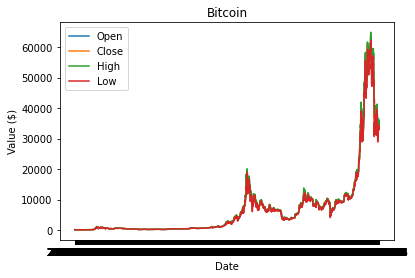

In [20]:
DF = BTC_DF

# plot lines
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.plot(DF['Date'], DF['Open'], label = "Open")
plt.plot(DF['Date'], DF['Close'], label = "Close")
plt.plot(DF['Date'], DF['High'], label = "High")
plt.plot(DF['Date'], DF['Low'], label = "Low")
#plt.gca().invert_xaxis() # flips x axis so it is [old]--->[new]
plt.legend()
plt.show()


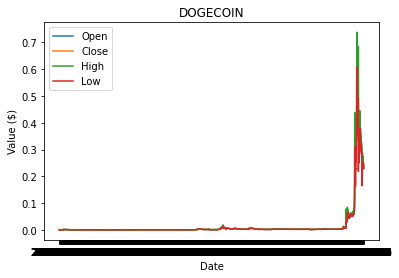

In [21]:
DF = DOGE_DF

# plot lines
plt.title('DOGECOIN')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.plot(DF['Date'], DF['Open'], label = "Open")
plt.plot(DF['Date'], DF['Close'], label = "Close")
plt.plot(DF['Date'], DF['High'], label = "High")
plt.plot(DF['Date'], DF['Low'], label = "Low")
#plt.gca().invert_xaxis() # flips x axis so it is [old]--->[new]
plt.legend()
plt.show()

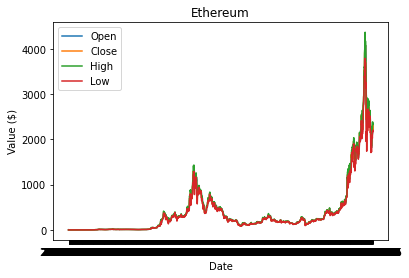

In [22]:
DF = ETH_DF

# plot lines
plt.title('Ethereum')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.plot(DF['Date'], DF['Open'], label = "Open")
plt.plot(DF['Date'], DF['Close'], label = "Close")
plt.plot(DF['Date'], DF['High'], label = "High")
plt.plot(DF['Date'], DF['Low'], label = "Low")
#plt.gca().invert_xaxis() # flips x axis so it is [old]--->[new]
plt.legend()
plt.show()

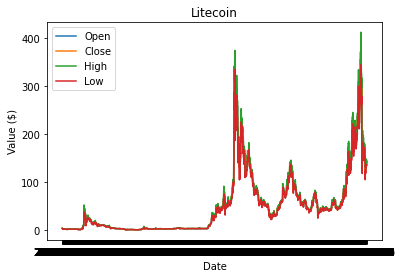

In [23]:
DF = LTC_DF

# plot lines
plt.title('Litecoin')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.plot(DF['Date'], DF['Open'], label = "Open")
plt.plot(DF['Date'], DF['Close'], label = "Close")
plt.plot(DF['Date'], DF['High'], label = "High")
plt.plot(DF['Date'], DF['Low'], label = "Low")
#plt.gca().invert_xaxis() # flips x axis so it is [old]--->[new]
plt.legend()
plt.show()

*Now that we can see that, it frankly only tells us one thing about each crypto and that is the price. This is because the Y-axis is far too large to differentiate between the high, low, and other information. But, we can still see some very important information that we must account for and analyze to the best of our ability.*

*These observations stem from the question what makes a good stock/crypto? Great returns? Well for that we need growth. But what about losses, how do we ensure the crypto is only going up? Also, what about rapid price fluctuations which is volatility (what we want to take advantage of)? We should account for that as well right? We should try and ride the way up and whenever it goes back down, exit taking advantage of the volatility. But how do we predict when to get in and out? How can we guess and see if the conditions are right? To do this, let's do analyze these cryptocurrencies from the past 3 years (2018-2021) in detail seeing if we can spot any trends.*

####***Deep Analysis of BITCOIN***####

In [24]:
slope2013 = [0,0,0,0]
slope2014 = [0,0,0,0]
slope2015 = [0,0,0,0]
slope2016 = [0,0,0,0]
slope2017 = [0,0,0,0]
slope2018 = [0,0,0,0]
slope2019 = [0,0,0,0]
slope2020 = [0,0,0,0]
slope2021 = [0,0,0,0]



In [25]:
BTC_DF

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,1.603769e+09,139.491997
1,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,1.542813e+09,141.500000
2,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,1.298955e+09,127.994999
3,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,1.168517e+09,110.794998
4,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,1.085995e+09,102.000000
...,...,...,...,...,...,...,...,...
2986,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11,33723.324384
2987,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11,34261.484882
2988,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11,34976.672316
2989,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11,34515.173443


In [26]:
#We can see BITCOIN data from 2013-2021. Lets split it up into seperate dataframes.
#just to declare... will remove row
BTC_2013 = BTC_DF.head(1) 
BTC_2014 = BTC_DF.head(1)
BTC_2015 = BTC_DF.head(1) 
BTC_2016 = BTC_DF.head(1) 
BTC_2017 = BTC_DF.head(1) 
BTC_2018 = BTC_DF.head(1) 
BTC_2019 = BTC_DF.head(1) 
BTC_2020 = BTC_DF.head(1) 
BTC_2021 = BTC_DF.head(1) 

#removing row
BTC_2013 = BTC_2013.drop(labels=0, axis=0)
BTC_2014 = BTC_2014.drop(labels=0, axis=0)
BTC_2015 = BTC_2015.drop(labels=0, axis=0)
BTC_2016 = BTC_2016.drop(labels=0, axis=0)
BTC_2017 = BTC_2017.drop(labels=0, axis=0)
BTC_2018 = BTC_2018.drop(labels=0, axis=0)
BTC_2019 = BTC_2019.drop(labels=0, axis=0)
BTC_2020 = BTC_2020.drop(labels=0, axis=0)
BTC_2021 = BTC_2021.drop(labels=0, axis=0)

#Go through bitcoin dataframe
for index, row in BTC_DF.iterrows():
  if ("2013" in row['Date']):
    BTC_2013.loc[len(BTC_2013.index)] = row
  elif ("2014" in row['Date']):
    BTC_2014.loc[len(BTC_2014.index)] = row
  elif ("2015" in row['Date']):
    BTC_2015.loc[len(BTC_2015.index)] = row
  elif ("2016" in row['Date']):
    BTC_2016.loc[len(BTC_2016.index)] = row
  elif ("2017" in row['Date']):
    BTC_2017.loc[len(BTC_2017.index)] = row
  elif ("2018" in row['Date']):
    BTC_2018.loc[len(BTC_2018.index)] = row
  elif ("2019" in row['Date']):
    BTC_2019.loc[len(BTC_2019.index)] = row
  elif ("2020" in row['Date']):
    BTC_2020.loc[len(BTC_2020.index)] = row  
  elif ("2021" in row['Date']):
    BTC_2021.loc[len(BTC_2021.index)] = row
  
BTC_2013


,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,1.603769e+09,139.491997
1,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,1.542813e+09,141.500000
2,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,1.298955e+09,127.994999
3,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,1.168517e+09,110.794998
4,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,1.085995e+09,102.000000
...,...,...,...,...,...,...,...,...
242,BTC,2013-12-27,777.510010,713.599976,763.280029,735.070007,8.955395e+09,749.175018
243,BTC,2013-12-28,747.059998,705.349976,737.979980,727.830017,8.869919e+09,732.904999
244,BTC,2013-12-29,748.609985,714.440002,728.049988,745.049988,9.082104e+09,736.549988
245,BTC,2013-12-30,766.599976,740.239990,741.349976,756.130005,9.217168e+09,748.739990


^ Just saying, I was surprised when I saw the averages that low and realized Bitcoin used the cheap!

Now, we shall go ahead and graph the average throughout the years and calulate the slope whitch is the change and see if we can predict the price of the crypto for the following year.


2013 Slope:
2.740516537753648
2013 Intercept:
-80.2802334019856
2014 Slope:
-1.1229051477607126
2014 Intercept:
732.189318490601
2015 Slope:
0.3398561572726621
2015 Intercept:
210.44737528919393
2016 Slope:
1.1781009540267915
2016 Intercept:
352.8134939349042
2017 Slope:
30.878740896650186
2017 Intercept:
-1631.5916047753096
2018 Slope:
-19.704085922099438
2018 Intercept:
11172.802447236954
2019 Slope:
16.694822494119208
2019 Intercept:
4351.774677271127
2020 Slope:
31.270668727778318
2020 Intercept:
5379.685597548623
2021 Slope:
-5.489633752397268
2021 Intercept:
46037.32392690135


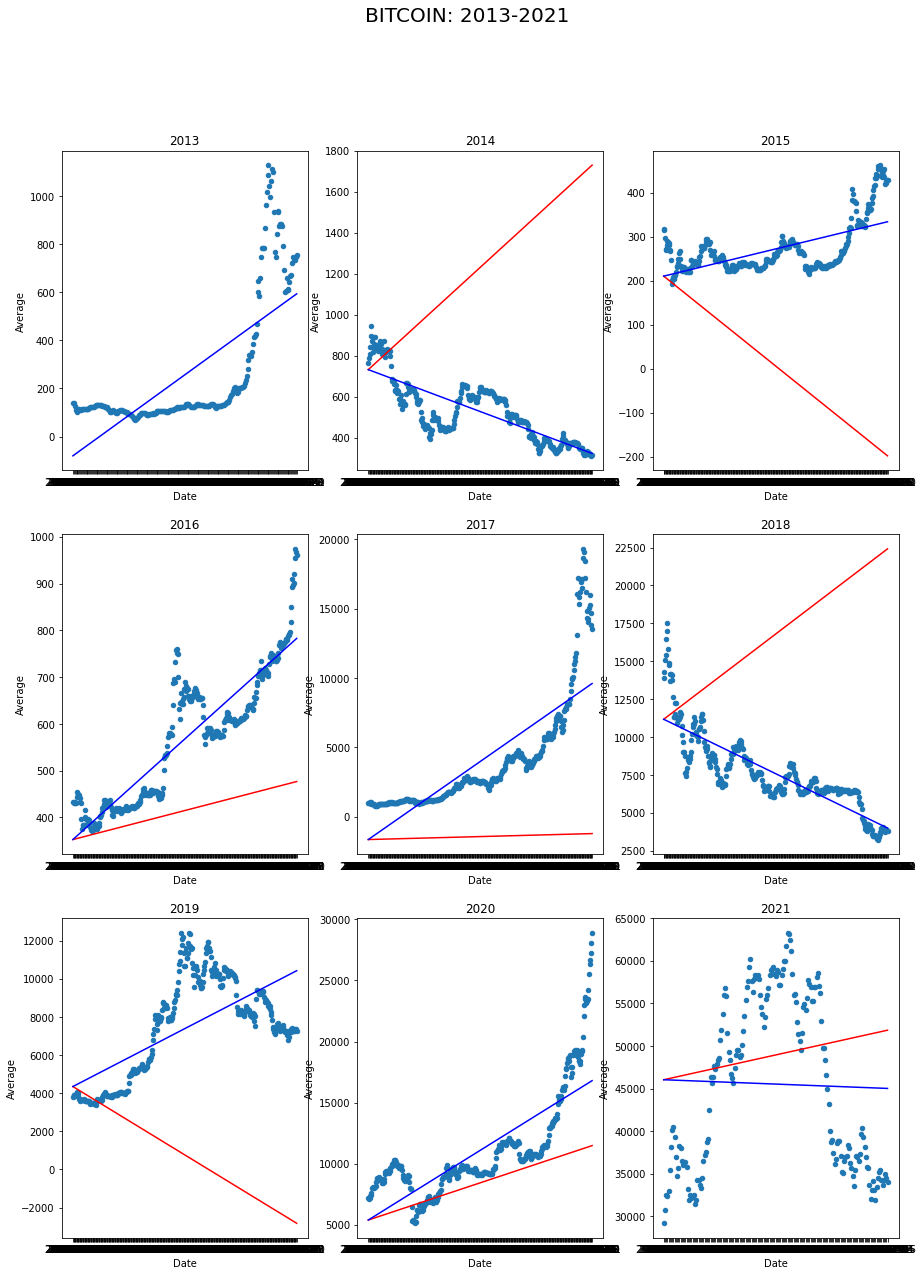

In [27]:
figure, axes = plt.subplots(3,3)
figure.set_size_inches(15, 20)
figure.suptitle('BITCOIN: 2013-2021', fontsize=20)

#2013
BTC_2013.plot.scatter('Date', 'Average', title='2013', ax=axes[0][0])
m1,b = np.polyfit(BTC_2013.index, BTC_2013['Average'], 1)
axes[0][0].plot(BTC_2013.index, m1*BTC_2013.index + b, color='blue')
print("2013 Slope:")
print(m1)
print("2013 Intercept:")
print(b)
slope2013[0] = m1

#2014
BTC_2014.plot.scatter('Date', 'Average', title='2014', ax=axes[0][1])
m,b = np.polyfit(BTC_2014.index, BTC_2014['Average'], 1)
axes[0][1].plot(BTC_2014.index, m1*BTC_2014.index + b, color='red') # based on prev year
axes[0][1].plot(BTC_2014.index, m*BTC_2014.index + b, color='blue')
print("2014 Slope:")
print(m)
print("2014 Intercept:")
print(b)
m1=m
slope2014[0] = m1


#2015
BTC_2015.plot.scatter('Date', 'Average', title='2015', ax=axes[0][2])
m,b = np.polyfit(BTC_2015.index, BTC_2015['Average'], 1)
axes[0][2].plot(BTC_2015.index, m1*BTC_2015.index + b, color='red') # based on prev year
axes[0][2].plot(BTC_2015.index, m*BTC_2015.index + b, color='blue')
print("2015 Slope:")
print(m)
print("2015 Intercept:")
print(b)
m1=m
slope2015[0] = m1

#2016
BTC_2016.plot.scatter('Date', 'Average', title='2016', ax=axes[1][0])
m,b = np.polyfit(BTC_2016.index, BTC_2016['Average'], 1)
axes[1][0].plot(BTC_2016.index, m1*BTC_2016.index + b, color='red') # based on prev year
axes[1][0].plot(BTC_2016.index, m*BTC_2016.index + b, color='blue')
print("2016 Slope:")
print(m)
print("2016 Intercept:")
print(b)
m1=m
slope2016[0] = m1

#2017
BTC_2017.plot.scatter('Date', 'Average', title='2017', ax=axes[1][1])
m,b = np.polyfit(BTC_2017.index, BTC_2017['Average'], 1)
axes[1][1].plot(BTC_2017.index, m1*BTC_2017.index + b, color='red') # based on prev year
axes[1][1].plot(BTC_2017.index, m*BTC_2017.index + b, color='blue')
print("2017 Slope:")
print(m)
print("2017 Intercept:")
print(b)
m1=m
slope2017[0] = m1

#2018
BTC_2018.plot.scatter('Date', 'Average', title='2018', ax=axes[1][2])
m,b = np.polyfit(BTC_2018.index, BTC_2018['Average'], 1)
axes[1][2].plot(BTC_2018.index, m1*BTC_2018.index + b, color='red') # based on prev year
axes[1][2].plot(BTC_2018.index, m*BTC_2018.index + b, color='blue')
print("2018 Slope:")
print(m)
print("2018 Intercept:")
print(b)
m1=m
slope2018[0] = m1


#2019
BTC_2019.plot.scatter('Date', 'Average', title='2019', ax=axes[2][0])
m,b = np.polyfit(BTC_2019.index, BTC_2019['Average'], 1)
axes[2][0].plot(BTC_2019.index, m1*BTC_2019.index + b, color='red') # based on prev year
axes[2][0].plot(BTC_2019.index, m*BTC_2019.index + b, color='blue')
print("2019 Slope:")
print(m)
print("2019 Intercept:")
print(b)
m1=m
slope2019[0] = m1

#2020
BTC_2020.plot.scatter('Date', 'Average', title='2020', ax=axes[2][1])
m,b = np.polyfit(BTC_2020.index, BTC_2020['Average'], 1)
axes[2][1].plot(BTC_2020.index, m1*BTC_2020.index + b, color='red') # based on prev year
axes[2][1].plot(BTC_2020.index, m*BTC_2020.index + b, color='blue')
print("2020 Slope:")
print(m)
print("2020 Intercept:")
print(b)
m1=m
slope2020[0] = m1

#2021
BTC_2021.plot.scatter('Date', 'Average', title='2021', ax=axes[2][2])
m,b = np.polyfit(BTC_2021.index, BTC_2021['Average'], 1)
axes[2][2].plot(BTC_2021.index, m1*BTC_2021.index + b, color='red') # based on prev year
axes[2][2].plot(BTC_2021.index, m*BTC_2021.index + b, color='blue')
print("2021 Slope:")
print(m)
print("2021 Intercept:")
print(b)
m1=m
slope2021[0] = m1




plt.show()


*Now a quick explanation of what we see. The blue line is the [linear regression](https://machinelearningmastery.com/linear-regression-for-machine-learning/) for that given year. And the red is supposed to be just a comparison from the last year. We can see that this does not work as a good way of prediction as the trends are much smaller. We will go ahead and plot the rest of the cryptocurrencies and try and spot smaller trends for our algorithm and we can use the valuable information such as the slope later on.*

In [28]:
DOGE_DF

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,DOGE,2013-12-16,0.000866,0.000150,0.000299,0.000205,1.509085e+06,0.000252
1,DOGE,2013-12-17,0.000289,0.000116,0.000207,0.000269,2.169688e+06,0.000238
2,DOGE,2013-12-18,0.000362,0.000205,0.000267,0.000362,3.188943e+06,0.000314
3,DOGE,2013-12-19,0.001520,0.000328,0.000395,0.001162,1.115034e+07,0.000779
4,DOGE,2013-12-20,0.001143,0.000662,0.001143,0.000704,7.284337e+06,0.000923
...,...,...,...,...,...,...,...,...
2755,DOGE,2021-07-02,0.247997,0.238848,0.243982,0.245264,3.194925e+10,0.244623
2756,DOGE,2021-07-03,0.250214,0.242454,0.245106,0.246411,3.210491e+10,0.245758
2757,DOGE,2021-07-04,0.252567,0.243425,0.246425,0.246483,3.211767e+10,0.246454
2758,DOGE,2021-07-05,0.246419,0.227838,0.246419,0.231614,3.018344e+10,0.239017


In [29]:
#We can see DOGECOIN data from 2013-2021. Lets split it up into seperate dataframes.
#just to declare... will remove row
DOGE_2013 = DOGE_DF.head(1) 
DOGE_2014 = DOGE_DF.head(1)
DOGE_2015 = DOGE_DF.head(1) 
DOGE_2016 = DOGE_DF.head(1) 
DOGE_2017 = DOGE_DF.head(1) 
DOGE_2018 = DOGE_DF.head(1) 
DOGE_2019 = DOGE_DF.head(1) 
DOGE_2020 = DOGE_DF.head(1) 
DOGE_2021 = DOGE_DF.head(1) 

#removing row
DOGE_2013 = DOGE_2013.drop(labels=0, axis=0)
DOGE_2014 = DOGE_2014.drop(labels=0, axis=0)
DOGE_2015 = DOGE_2015.drop(labels=0, axis=0)
DOGE_2016 = DOGE_2016.drop(labels=0, axis=0)
DOGE_2017 = DOGE_2017.drop(labels=0, axis=0)
DOGE_2018 = DOGE_2018.drop(labels=0, axis=0)
DOGE_2019 = DOGE_2019.drop(labels=0, axis=0)
DOGE_2020 = DOGE_2020.drop(labels=0, axis=0)
DOGE_2021 = DOGE_2021.drop(labels=0, axis=0)

#Go through dogecoin dataframe
for index, row in DOGE_DF.iterrows():
  if ("2013" in row['Date']):
    DOGE_2013.loc[len(DOGE_2013.index)] = row
  elif ("2014" in row['Date']):
    DOGE_2014.loc[len(DOGE_2014.index)] = row
  elif ("2015" in row['Date']):
    DOGE_2015.loc[len(DOGE_2015.index)] = row
  elif ("2016" in row['Date']):
    DOGE_2016.loc[len(DOGE_2016.index)] = row
  elif ("2017" in row['Date']):
    DOGE_2017.loc[len(DOGE_2017.index)] = row
  elif ("2018" in row['Date']):
    DOGE_2018.loc[len(DOGE_2018.index)] = row
  elif ("2019" in row['Date']):
    DOGE_2019.loc[len(DOGE_2019.index)] = row
  elif ("2020" in row['Date']):
    DOGE_2020.loc[len(DOGE_2020.index)] = row  
  elif ("2021" in row['Date']):
    DOGE_2021.loc[len(DOGE_2021.index)] = row
  
DOGE_2014


,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,DOGE,2014-01-01,0.000451,0.000423,0.000423,0.000440,8.335005e+06,0.000431
1,DOGE,2014-01-02,0.000449,0.000331,0.000449,0.000353,6.935467e+06,0.000401
2,DOGE,2014-01-03,0.000376,0.000293,0.000353,0.000303,6.162990e+06,0.000328
3,DOGE,2014-01-04,0.000321,0.000256,0.000305,0.000301,6.323972e+06,0.000303
4,DOGE,2014-01-05,0.000312,0.000247,0.000300,0.000271,5.883644e+06,0.000286
...,...,...,...,...,...,...,...,...
360,DOGE,2014-12-27,0.000191,0.000182,0.000190,0.000184,1.783680e+07,0.000187
361,DOGE,2014-12-28,0.000186,0.000179,0.000183,0.000184,1.787758e+07,0.000184
362,DOGE,2014-12-29,0.000186,0.000178,0.000183,0.000182,1.763626e+07,0.000182
363,DOGE,2014-12-30,0.000182,0.000177,0.000181,0.000179,1.736027e+07,0.000180


2013 Slope:
4.118582268454386e-06
2013 Intercept:
0.00046613938165511877
2014 Slope:
-2.495953111878331e-06
2014 Intercept:
0.0009149880578016601
2015 Slope:
-2.0157906795776274e-08
2015 Intercept:
0.00014634260177245412
2016 Slope:
-2.0550697646730532e-08
2016 Intercept:
0.00023914295154810607
2017 Slope:
8.772531373672451e-06
2017 Intercept:
-8.476323853875566e-06
2018 Slope:
-1.1302017345063253e-05
2018 Intercept:
0.00641635807906857
2019 Slope:
6.486595815865678e-07
2019 Intercept:
0.002445227725769725
2020 Slope:
3.553060258842127e-06
2020 Intercept:
0.002091107340923388
2021 Slope:
0.0023656756486113506
2021 Intercept:
-0.04122319631016045


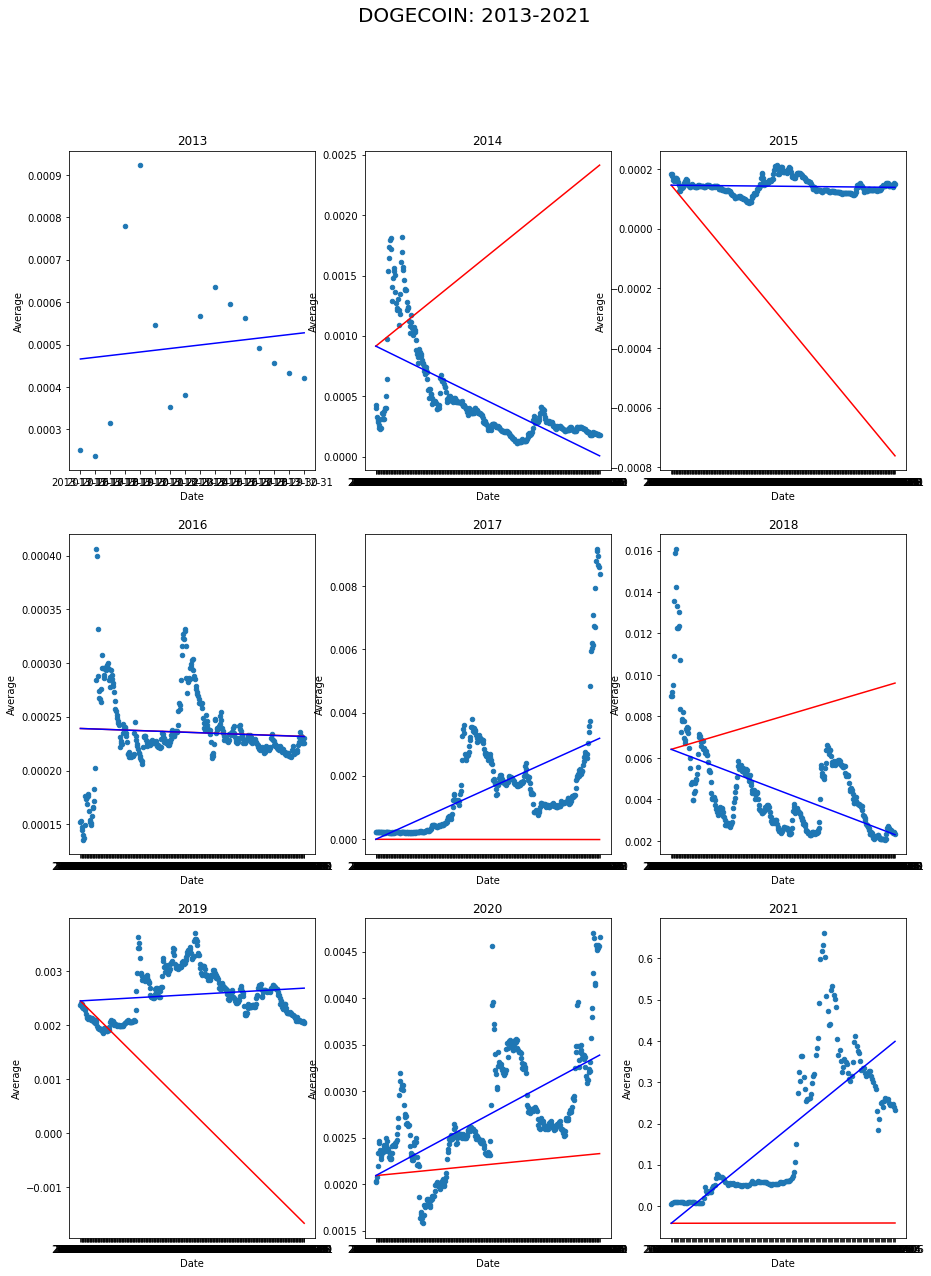

In [30]:
figure, axes = plt.subplots(3,3)
figure.set_size_inches(15, 20)
figure.suptitle('DOGECOIN: 2013-2021', fontsize=20)
 
#2013
DOGE_2013.plot.scatter('Date', 'Average', title='2013', ax=axes[0][0])
m1,b = np.polyfit(DOGE_2013.index, DOGE_2013['Average'], 1)
axes[0][0].plot(DOGE_2013.index, m1*DOGE_2013.index + b, color='blue')
print("2013 Slope:")
print(m1)
print("2013 Intercept:")
print(b)
slope2013[1] = m1


#2014
DOGE_2014.plot.scatter('Date', 'Average', title='2014', ax=axes[0][1])
m,b = np.polyfit(DOGE_2014.index, DOGE_2014['Average'], 1)
axes[0][1].plot(DOGE_2014.index, m1*DOGE_2014.index + b, color='red') # based on prev year
axes[0][1].plot(DOGE_2014.index, m*DOGE_2014.index + b, color='blue')
print("2014 Slope:")
print(m)
print("2014 Intercept:")
print(b)
m1=m
slope2014[1] = m1
 
 
#2015
DOGE_2015.plot.scatter('Date', 'Average', title='2015', ax=axes[0][2])
m,b = np.polyfit(DOGE_2015.index, DOGE_2015['Average'], 1)
axes[0][2].plot(DOGE_2015.index, m1*DOGE_2015.index + b, color='red') # based on prev year
axes[0][2].plot(DOGE_2015.index, m*DOGE_2015.index + b, color='blue')
print("2015 Slope:")
print(m)
print("2015 Intercept:")
print(b)
m1=m
slope2015[1] = m1

 
#2016
DOGE_2016.plot.scatter('Date', 'Average', title='2016', ax=axes[1][0])
m,b = np.polyfit(DOGE_2016.index, DOGE_2016['Average'], 1)
axes[1][0].plot(DOGE_2016.index, m1*DOGE_2016.index + b, color='red') # based on prev year
axes[1][0].plot(DOGE_2016.index, m*DOGE_2016.index + b, color='blue')
print("2016 Slope:")
print(m)
print("2016 Intercept:")
print(b)
m1=m
slope2016[1] = m1

 
#2017
DOGE_2017.plot.scatter('Date', 'Average', title='2017', ax=axes[1][1])
m,b = np.polyfit(DOGE_2017.index, DOGE_2017['Average'], 1)
axes[1][1].plot(DOGE_2017.index, m1*DOGE_2017.index + b, color='red') # based on prev year
axes[1][1].plot(DOGE_2017.index, m*DOGE_2017.index + b, color='blue')
print("2017 Slope:")
print(m)
print("2017 Intercept:")
print(b)
m1=m
slope2017[1] = m1

 
#2018
DOGE_2018.plot.scatter('Date', 'Average', title='2018', ax=axes[1][2])
m,b = np.polyfit(DOGE_2018.index, DOGE_2018['Average'], 1)
axes[1][2].plot(DOGE_2018.index, m1*DOGE_2018.index + b, color='red') # based on prev year
axes[1][2].plot(DOGE_2018.index, m*DOGE_2018.index + b, color='blue')
print("2018 Slope:")
print(m)
print("2018 Intercept:")
print(b)
m1=m
slope2018[1] = m1

 
#2019
DOGE_2019.plot.scatter('Date', 'Average', title='2019', ax=axes[2][0])
m,b = np.polyfit(DOGE_2019.index, DOGE_2019['Average'], 1)
axes[2][0].plot(DOGE_2019.index, m1*DOGE_2019.index + b, color='red') # based on prev year
axes[2][0].plot(DOGE_2019.index, m*DOGE_2019.index + b, color='blue')
print("2019 Slope:")
print(m)
print("2019 Intercept:")
print(b)
m1=m
slope2019[1] = m1

 
#2020
DOGE_2020.plot.scatter('Date', 'Average', title='2020', ax=axes[2][1])
m,b = np.polyfit(DOGE_2020.index, DOGE_2020['Average'], 1)
axes[2][1].plot(DOGE_2020.index, m1*DOGE_2020.index + b, color='red') # based on prev year
axes[2][1].plot(DOGE_2020.index, m*DOGE_2020.index + b, color='blue')
print("2020 Slope:")
print(m)
print("2020 Intercept:")
print(b)
m1=m
slope2020[1] = m1


#2021
DOGE_2021.plot.scatter('Date', 'Average', title='2021', ax=axes[2][2])
m,b = np.polyfit(DOGE_2021.index, DOGE_2021['Average'], 1)
axes[2][2].plot(DOGE_2021.index, m1*DOGE_2021.index + b, color='red') # based on prev year
axes[2][2].plot(DOGE_2021.index, m*DOGE_2021.index + b, color='blue')
print("2021 Slope:")
print(m)
print("2021 Intercept:")
print(b)
m1=m
slope2021[1] = m1

 
 
 
plt.show()



In [31]:
ETH_DF

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,ETH,2015-08-08,2.798810,0.714725,2.793760,0.753325,4.548689e+07,1.773543
1,ETH,2015-08-09,0.879810,0.629191,0.706136,0.701897,4.239957e+07,0.704017
2,ETH,2015-08-10,0.729854,0.636546,0.713989,0.708448,4.281836e+07,0.711219
3,ETH,2015-08-11,1.131410,0.663235,0.708087,1.067860,6.456929e+07,0.887974
4,ETH,2015-08-12,1.289940,0.883608,1.058750,1.217440,7.364501e+07,1.138095
...,...,...,...,...,...,...,...,...
2155,ETH,2021-07-02,2155.596496,2021.824808,2109.892677,2150.040364,2.505527e+11,2129.966521
2156,ETH,2021-07-03,2237.567155,2117.590013,2150.835025,2226.114282,2.594475e+11,2188.474654
2157,ETH,2021-07-04,2384.286857,2190.837703,2226.550382,2321.724112,2.706217e+11,2274.137247
2158,ETH,2021-07-05,2321.922836,2163.041394,2321.922836,2198.582464,2.562978e+11,2260.252650


In [32]:
#We can see Ethereum data from 2015-2021. Lets split it up into seperate dataframes.
#just to declare... will remove row
ETH_2015 = ETH_DF.head(1)
ETH_2016 = ETH_DF.head(1)
ETH_2017 = ETH_DF.head(1)
ETH_2018 = ETH_DF.head(1)
ETH_2019 = ETH_DF.head(1)
ETH_2020 = ETH_DF.head(1)
ETH_2021 = ETH_DF.head(1)
 
#removing row
ETH_2015 = ETH_2015.drop(labels=0, axis=0)
ETH_2016 = ETH_2016.drop(labels=0, axis=0)
ETH_2017 = ETH_2017.drop(labels=0, axis=0)
ETH_2018 = ETH_2018.drop(labels=0, axis=0)
ETH_2019 = ETH_2019.drop(labels=0, axis=0)
ETH_2020 = ETH_2020.drop(labels=0, axis=0)
ETH_2021 = ETH_2021.drop(labels=0, axis=0)
 
#Go through Ethereum dataframe
for index, row in ETH_DF.iterrows():
  if ("2015" in row['Date']):
   ETH_2015.loc[len(ETH_2015.index)] = row
  elif ("2016" in row['Date']):
   ETH_2016.loc[len(ETH_2016.index)] = row
  elif ("2017" in row['Date']):
   ETH_2017.loc[len(ETH_2017.index)] = row
  elif ("2018" in row['Date']):
   ETH_2018.loc[len(ETH_2018.index)] = row
  elif ("2019" in row['Date']):
   ETH_2019.loc[len(ETH_2019.index)] = row
  elif ("2020" in row['Date']):
   ETH_2020.loc[len(ETH_2020.index)] = row 
  elif ("2021" in row['Date']):
   ETH_2021.loc[len(ETH_2021.index)] = row


ETH_2016
 
 

,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,ETH,2016-01-01,0.954822,0.931442,0.933712,0.948024,7.198039e+07,0.940868
1,ETH,2016-01-02,0.969637,0.936560,0.947401,0.937124,7.117666e+07,0.942263
2,ETH,2016-01-03,0.991362,0.934313,0.938430,0.971905,7.384329e+07,0.955168
3,ETH,2016-01-04,0.976438,0.929835,0.972045,0.954480,7.254371e+07,0.963262
4,ETH,2016-01-05,0.970597,0.946543,0.953147,0.950176,7.224097e+07,0.951661
...,...,...,...,...,...,...,...,...
361,ETH,2016-12-27,7.322580,7.090470,7.276370,7.170820,6.262687e+08,7.223595
362,ETH,2016-12-28,7.624060,7.082250,7.148950,7.520110,6.570119e+08,7.334530
363,ETH,2016-12-29,8.527410,7.539130,7.539130,8.284160,7.240281e+08,7.911645
364,ETH,2016-12-30,8.466090,8.054680,8.289880,8.159980,7.134336e+08,8.224930


2015 Slope:
-0.002650846962638804
2015 Intercept:
1.1289419112406798
2016 Slope:
0.016013054787553556
2016 Intercept:
6.848497865030922
2017 Slope:
1.5643999218576243
2017 Intercept:
-61.79543949959649
2018 Slope:
-2.6094638123972635
2018 Intercept:
959.3749689839291
2019 Slope:
0.09225547902123729
2019 Intercept:
164.980545356591
2020 Slope:
1.1998005250149102
2020 Intercept:
87.75761006787857
2021 Slope:
8.988210054879069
2021 Intercept:
1236.9392628105243


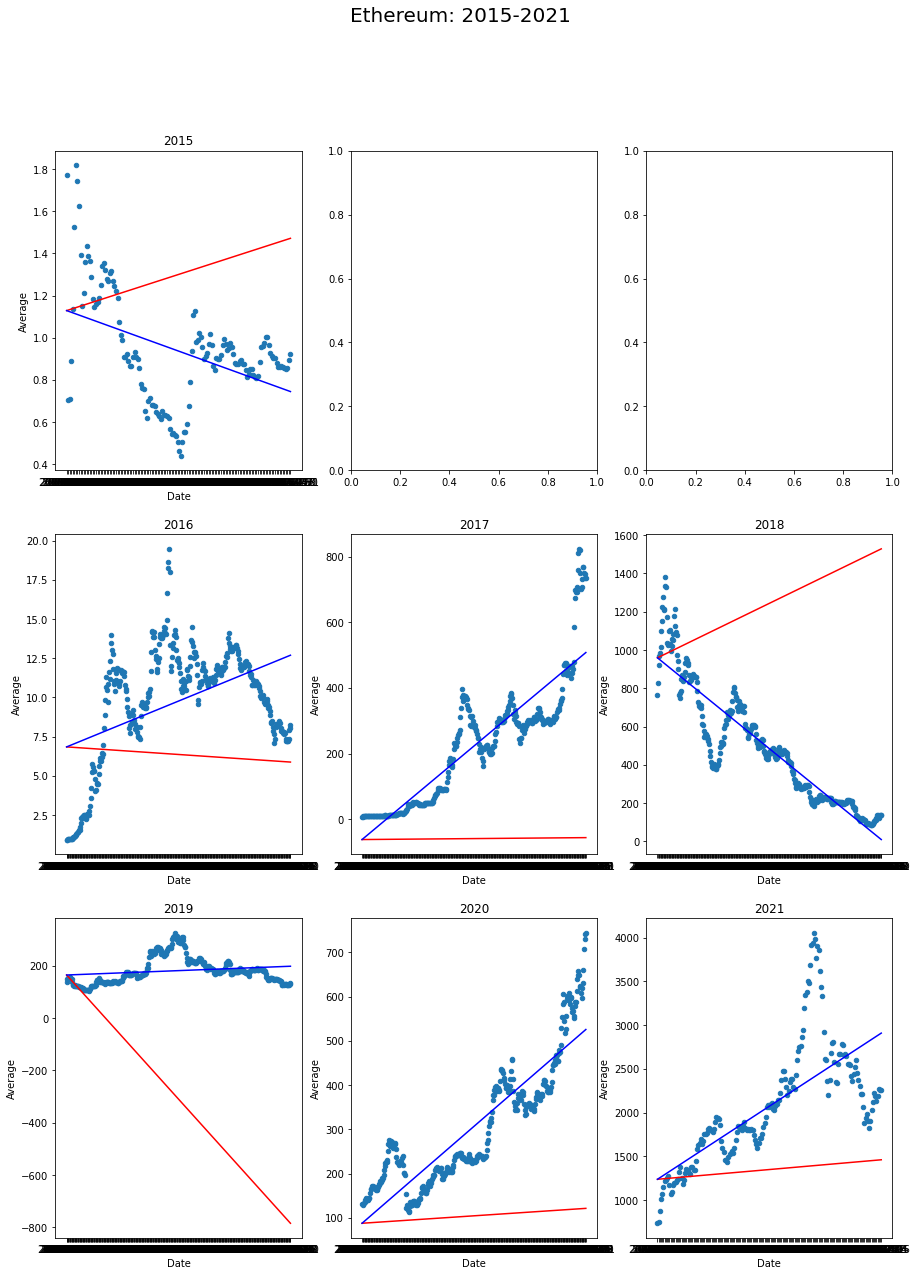

In [33]:
figure, axes = plt.subplots(3,3)
figure.set_size_inches(15, 20)
figure.suptitle('Ethereum: 2015-2021', fontsize=20)
#2015
ETH_2015.plot.scatter('Date', 'Average', title='2015', ax=axes[0][0])
m,b = np.polyfit(ETH_2015.index, ETH_2015['Average'], 1)
axes[0][0].plot(ETH_2015.index, m1*ETH_2015.index + b, color='red') # based on prev year
axes[0][0].plot(ETH_2015.index, m*ETH_2015.index + b, color='blue')
print("2015 Slope:")
print(m)
print("2015 Intercept:")
print(b)
m1=m
slope2015[2] = m1


#2016
ETH_2016.plot.scatter('Date', 'Average', title='2016', ax=axes[1][0])
m,b = np.polyfit(ETH_2016.index, ETH_2016['Average'], 1)
axes[1][0].plot(ETH_2016.index, m1*ETH_2016.index + b, color='red') # based on prev year
axes[1][0].plot(ETH_2016.index, m*ETH_2016.index + b, color='blue')
print("2016 Slope:")
print(m)
print("2016 Intercept:")
print(b)
m1=m
slope2016[2] = m1

#2017
ETH_2017.plot.scatter('Date', 'Average', title='2017', ax=axes[1][1])
m,b = np.polyfit(ETH_2017.index, ETH_2017['Average'], 1)
axes[1][1].plot(ETH_2017.index, m1*ETH_2017.index + b, color='red') # based on prev year
axes[1][1].plot(ETH_2017.index, m*ETH_2017.index + b, color='blue')
print("2017 Slope:")
print(m)
print("2017 Intercept:")
print(b)
m1=m
slope2017[2] = m1


#2018
ETH_2018.plot.scatter('Date', 'Average', title='2018', ax=axes[1][2])
m,b = np.polyfit(ETH_2018.index, ETH_2018['Average'], 1)
axes[1][2].plot(ETH_2018.index, m1*ETH_2018.index + b, color='red') # based on prev year
axes[1][2].plot(ETH_2018.index, m*ETH_2018.index + b, color='blue')
print("2018 Slope:")
print(m)
print("2018 Intercept:")
print(b)
m1=m
slope2018[2] = m1

#2019
ETH_2019.plot.scatter('Date', 'Average', title='2019', ax=axes[2][0])
m,b = np.polyfit(ETH_2019.index, ETH_2019['Average'], 1)
axes[2][0].plot(ETH_2019.index, m1*ETH_2019.index + b, color='red') # based on prev year
axes[2][0].plot(ETH_2019.index, m*ETH_2019.index + b, color='blue')
print("2019 Slope:")
print(m)
print("2019 Intercept:")
print(b)
m1=m
slope2019[2] = m1


#2020
ETH_2020.plot.scatter('Date', 'Average', title='2020', ax=axes[2][1])
m,b = np.polyfit(ETH_2020.index, ETH_2020['Average'], 1)
axes[2][1].plot(ETH_2020.index, m1*ETH_2020.index + b, color='red') # based on prev year
axes[2][1].plot(ETH_2020.index, m*ETH_2020.index + b, color='blue')
print("2020 Slope:")
print(m)
print("2020 Intercept:")
print(b)
m1=m
slope2020[2] = m1

#2021
ETH_2021.plot.scatter('Date', 'Average', title='2021', ax=axes[2][2])
m,b = np.polyfit(ETH_2021.index, ETH_2021['Average'], 1)
axes[2][2].plot(ETH_2021.index, m1*ETH_2021.index + b, color='red') # based on prev year
axes[2][2].plot(ETH_2021.index, m*ETH_2021.index + b, color='blue')
print("2021 Slope:")
print(m)
print("2021 Intercept:")
print(b)
m1=m
slope2021[2] = m1


plt.show()
 
 
 



In [34]:
LTC_DF


,Symbol,Date,High,Low,Open,Close,Marketcap,Average
0,LTC,2013-04-29,4.573600,4.225640,4.366760,4.383900,7.538896e+07,4.375330
1,LTC,2013-04-30,4.572380,4.168960,4.403520,4.296490,7.402092e+07,4.350005
2,LTC,2013-05-01,4.356860,3.520290,4.289540,3.801010,6.560460e+07,4.045275
3,LTC,2013-05-02,4.039300,3.007170,3.780020,3.371980,5.828798e+07,3.576000
4,LTC,2013-05-03,3.453610,2.395940,3.390440,3.044910,5.269485e+07,3.217675
...,...,...,...,...,...,...,...,...
2986,LTC,2021-07-02,138.787700,130.935471,137.299274,136.943696,9.141322e+09,137.121485
2987,LTC,2021-07-03,141.356011,134.945288,136.930584,140.279688,9.364008e+09,138.605136
2988,LTC,2021-07-04,147.836059,137.096427,140.317998,144.905849,9.672815e+09,142.611923
2989,LTC,2021-07-05,144.849333,134.960263,144.849333,138.073246,9.216723e+09,141.461290


In [35]:
#We can see BITCOIN data from 2013-2021. Lets split it up into seperate dataframes.
#just to declare... will remove row
LTC_2013 = LTC_DF.head(1)
LTC_2014 = LTC_DF.head(1)
LTC_2015 = LTC_DF.head(1)
LTC_2016 = LTC_DF.head(1)
LTC_2017 = LTC_DF.head(1)
LTC_2018 = LTC_DF.head(1)
LTC_2019 = LTC_DF.head(1)
LTC_2020 = LTC_DF.head(1)
LTC_2021 = LTC_DF.head(1)
 
#removing row
LTC_2013 = LTC_2013.drop(labels=0, axis=0)
LTC_2014 = LTC_2014.drop(labels=0, axis=0)
LTC_2015 = LTC_2015.drop(labels=0, axis=0)
LTC_2016 = LTC_2016.drop(labels=0, axis=0)
LTC_2017 = LTC_2017.drop(labels=0, axis=0)
LTC_2018 = LTC_2018.drop(labels=0, axis=0)
LTC_2019 = LTC_2019.drop(labels=0, axis=0)
LTC_2020 = LTC_2020.drop(labels=0, axis=0)
LTC_2021 = LTC_2021.drop(labels=0, axis=0)
 
#Go through bitcoin dataframe
for index, row in LTC_DF.iterrows():
 if ("2013" in row['Date']):
   LTC_2013.loc[len(LTC_2013.index)] = row
 elif ("2014" in row['Date']):
   LTC_2014.loc[len(LTC_2014.index)] = row
 elif ("2015" in row['Date']):
   LTC_2015.loc[len(LTC_2015.index)] = row
 elif ("2016" in row['Date']):
   LTC_2016.loc[len(LTC_2016.index)] = row
 elif ("2017" in row['Date']):
   LTC_2017.loc[len(LTC_2017.index)] = row
 elif ("2018" in row['Date']):
   LTC_2018.loc[len(LTC_2018.index)] = row
 elif ("2019" in row['Date']):
   LTC_2019.loc[len(LTC_2019.index)] = row
 elif ("2020" in row['Date']):
   LTC_2020.loc[len(LTC_2020.index)] = row 
 elif ("2021" in row['Date']):
   LTC_2021.loc[len(LTC_2021.index)] = row
 LTC_2014
 
 

2013 Slope:
0.07610137113414542
2013 Intercept:
-2.7266740729669605
2014 Slope:
-0.055614607674617206
2014 Intercept:
19.99699735965938
2015 Slope:
0.0066964170217866485
2015 Intercept:
1.4751257624032923
2016 Slope:
0.0020531757579195825
2016 Intercept:
3.4150306694283343
2017 Slope:
0.43289730153242756
2017 Intercept:
-29.048410130007554
2018 Slope:
-0.5497223895913
2018 Intercept:
206.11453998879747
2019 Slope:
0.009726861260356321
2019 Intercept:
67.88220238888267
2020 Slope:
0.07023113936521616
2020 Intercept:
43.31436991885295
2021 Slope:
0.21057546219444995
2021 Intercept:
177.7274791207022


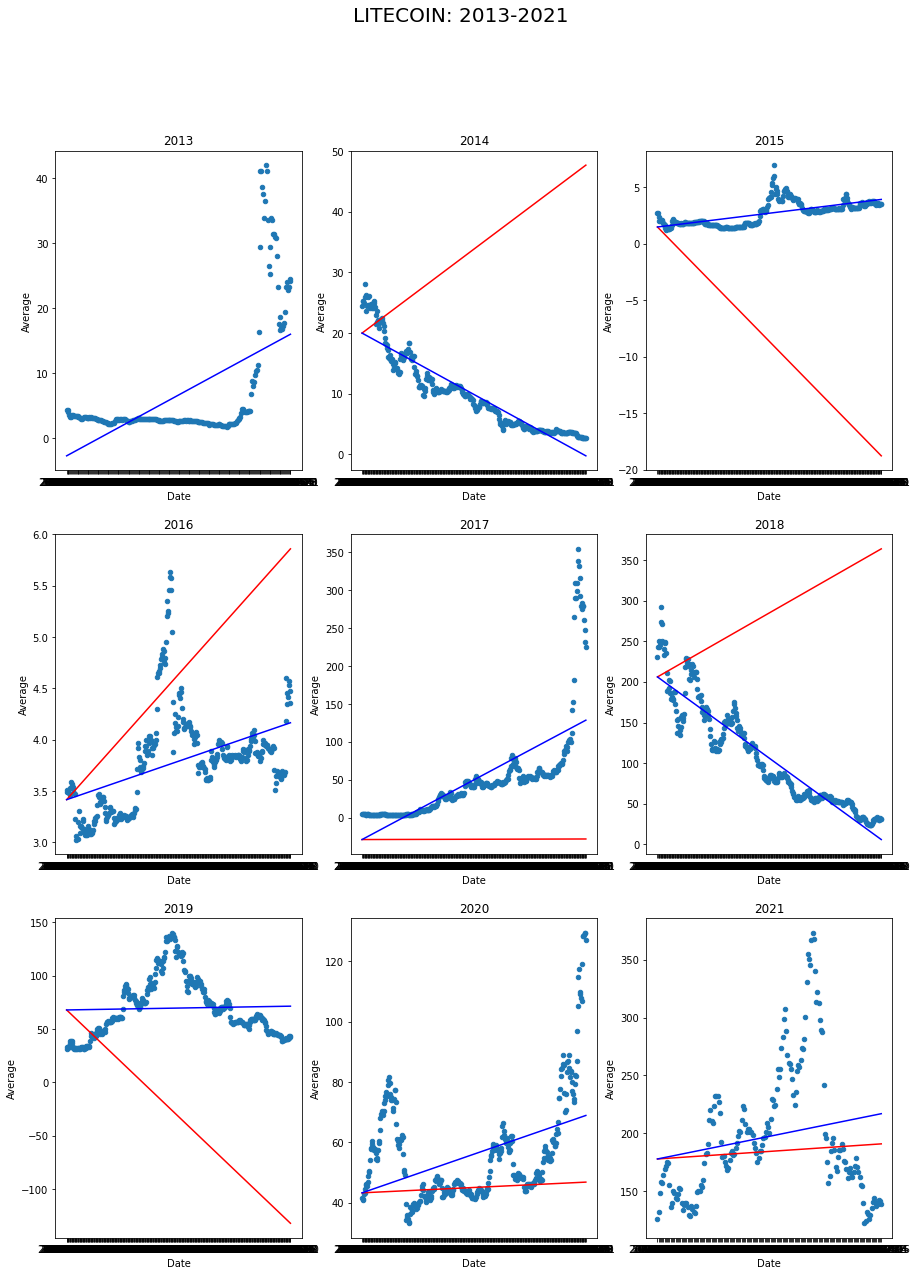

In [36]:
figure, axes = plt.subplots(3,3)
figure.set_size_inches(15, 20)
figure.suptitle('LITECOIN: 2013-2021', fontsize=20)
 
#2013
LTC_2013.plot.scatter('Date', 'Average', title='2013', ax=axes[0][0])
m1,b = np.polyfit(LTC_2013.index, LTC_2013['Average'], 1)
axes[0][0].plot(LTC_2013.index, m1*LTC_2013.index + b, color='blue')
print("2013 Slope:")
print(m1)
print("2013 Intercept:")
print(b)
slope2013[3] = m1

 
#2014
LTC_2014.plot.scatter('Date', 'Average', title='2014', ax=axes[0][1])
m,b = np.polyfit(LTC_2014.index, LTC_2014['Average'], 1)
axes[0][1].plot(LTC_2014.index, m1*LTC_2014.index + b, color='red') # based on prev year
axes[0][1].plot(LTC_2014.index, m*LTC_2014.index + b, color='blue')
print("2014 Slope:")
print(m)
print("2014 Intercept:")
print(b)
m1=m
slope2014[3] = m1

 
#2015
LTC_2015.plot.scatter('Date', 'Average', title='2015', ax=axes[0][2])
m,b = np.polyfit(LTC_2015.index, LTC_2015['Average'], 1)
axes[0][2].plot(LTC_2015.index, m1*LTC_2015.index + b, color='red') # based on prev year
axes[0][2].plot(LTC_2015.index, m*LTC_2015.index + b, color='blue')
print("2015 Slope:")
print(m)
print("2015 Intercept:")
print(b)
m1=m
slope2015[3] = m1

#2016
LTC_2016.plot.scatter('Date', 'Average', title='2016', ax=axes[1][0])
m,b = np.polyfit(LTC_2016.index, LTC_2016['Average'], 1)
axes[1][0].plot(LTC_2016.index, m1*LTC_2016.index + b, color='red') # based on prev year
axes[1][0].plot(LTC_2016.index, m*LTC_2016.index + b, color='blue')
print("2016 Slope:")
print(m)
print("2016 Intercept:")
print(b)
m1=m
slope2016[3] = m1

 
#2017
LTC_2017.plot.scatter('Date', 'Average', title='2017', ax=axes[1][1])
m,b = np.polyfit(LTC_2017.index, LTC_2017['Average'], 1)
axes[1][1].plot(LTC_2017.index, m1*LTC_2017.index + b, color='red') # based on prev year
axes[1][1].plot(LTC_2017.index, m*LTC_2017.index + b, color='blue')
print("2017 Slope:")
print(m)
print("2017 Intercept:")
print(b)
m1=m
slope2017[3] = m1

 
#2018
LTC_2018.plot.scatter('Date', 'Average', title='2018', ax=axes[1][2])
m,b = np.polyfit(LTC_2018.index, LTC_2018['Average'], 1)
axes[1][2].plot(LTC_2018.index, m1*LTC_2018.index + b, color='red') # based on prev year
axes[1][2].plot(LTC_2018.index, m*LTC_2018.index + b, color='blue')
print("2018 Slope:")
print(m)
print("2018 Intercept:")
print(b)
m1=m
slope2018[3] = m1

 
#2019
LTC_2019.plot.scatter('Date', 'Average', title='2019', ax=axes[2][0])
m,b = np.polyfit(LTC_2019.index, LTC_2019['Average'], 1)
axes[2][0].plot(LTC_2019.index, m1*LTC_2019.index + b, color='red') # based on prev year
axes[2][0].plot(LTC_2019.index, m*LTC_2019.index + b, color='blue')
print("2019 Slope:")
print(m)
print("2019 Intercept:")
print(b)
m1=m
slope2019[3] = m1


#2020
LTC_2020.plot.scatter('Date', 'Average', title='2020', ax=axes[2][1])
m,b = np.polyfit(LTC_2020.index, LTC_2020['Average'], 1)
axes[2][1].plot(LTC_2020.index, m1*LTC_2020.index + b, color='red') # based on prev year
axes[2][1].plot(LTC_2020.index, m*LTC_2020.index + b, color='blue')
print("2020 Slope:")
print(m)
print("2020 Intercept:")
print(b)
m1=m
slope2020[3] = m1

#2021
LTC_2021.plot.scatter('Date', 'Average', title='2021', ax=axes[2][2])
m,b = np.polyfit(LTC_2021.index, LTC_2021['Average'], 1)
axes[2][2].plot(LTC_2021.index, m1*LTC_2021.index + b, color='red') # based on prev year
axes[2][2].plot(LTC_2021.index, m*LTC_2021.index + b, color='blue')
print("2021 Slope:")
print(m)
print("2021 Intercept:")
print(b)
m1=m
slope2021[3] = m1

 
 
plt.show()
 
 

Now that we have all that information, I think it would be really cool to see the best stocks to invest in for a given year. We can visually see this by putting the slopes for a given year in a pie chart.

In [37]:
#Dividing the slope by average is a Terrible idea

#slope2013[0] = slope2013[0]/(BTC_2013['Average'].mean())
#slope2013[1] = slope2013[1]/(DOGE_2013['Average'].mean())
#slope2013[3] = slope2013[3]/(LTC_2013['Average'].mean())

#slope2014[0] = slope2014[0]/BTC_2014['Average'].mean()
#slope2014[1] = slope2014[1]/DOGE_2014['Average'].mean()
#slope2014[3] = slope2014[3]/LTC_2014['Average'].mean()

#slope2015[0] = slope2015[0]/BTC_2015['Average'].mean()
#slope2015[1] = slope2015[1]/DOGE_2015['Average'].mean()
#slope2015[2] = slope2015[2]/ETH_2015['Average'].mean()
#slope2015[3] = slope2015[3]/LTC_2015['Average'].mean()
 
#slope2016[0] = slope2016[0]/BTC_2016['Average'].mean()
#slope2016[1] = slope2016[1]/DOGE_2016['Average'].mean()
#slope2016[2] = slope2016[2]/ETH_2016['Average'].mean()
#slope2016[3] = slope2016[3]/LTC_2016['Average'].mean()
 
#slope2017[0] = slope2017[0]/BTC_2017['Average'].mean()
#slope2017[1] = slope2017[1]/DOGE_2017['Average'].mean()
#slope2017[2] = slope2017[2]/ETH_2017['Average'].mean()
#slope2017[3] = slope2017[3]/LTC_2017['Average'].mean()
 
#slope2018[0] = slope2018[0]/BTC_2018['Average'].mean()
#slope2018[1] = slope2018[1]/DOGE_2018['Average'].mean()
#slope2018[2] = slope2018[2]/ETH_2018['Average'].mean()
#slope2018[3] = slope2018[3]/LTC_2018['Average'].mean()
 
#slope2019[0] = slope2019[0]/BTC_2019['Average'].mean()
#slope2019[1] = slope2019[1]/DOGE_2019['Average'].mean()
#slope2019[2] = slope2019[2]/ETH_2019['Average'].mean()
#slope2019[3] = slope2019[3]/LTC_2019['Average'].mean()
 
#slope2020[0] = slope2020[0]/BTC_2020['Average'].mean()
#slope2020[1] = slope2020[1]/DOGE_2020['Average'].mean()
#slope2020[2] = slope2020[2]/ETH_2020['Average'].mean()
#slope2020[3] = slope2020[3]/LTC_2020['Average'].mean()
 
#slope2021[0] = slope2021[0]/BTC_2021['Average'].mean()
#slope2021[1] = slope2021[1]/DOGE_2021['Average'].mean()
#slope2021[2] = slope2021[2]/ETH_2021['Average'].mean()
#slope2021[3] = slope2021[3]/LTC_2021['Average'].mean()



In [38]:
slope2021

[-5.489633752397268,
 0.0023656756486113506,
 8.988210054879069,
 0.21057546219444995]

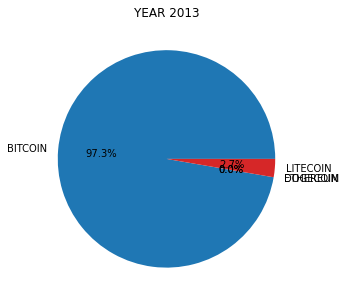

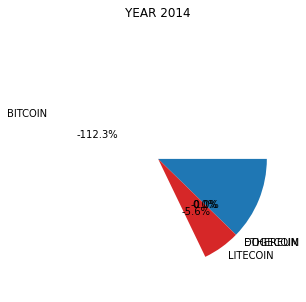

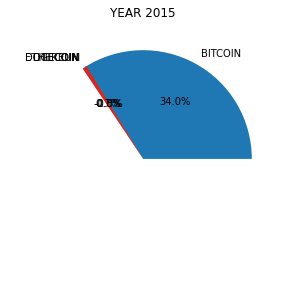

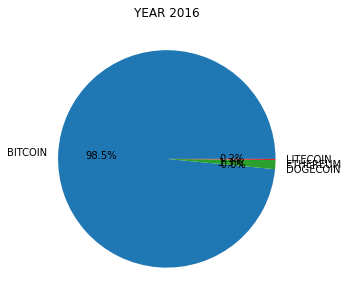

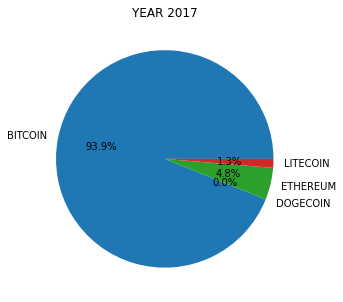

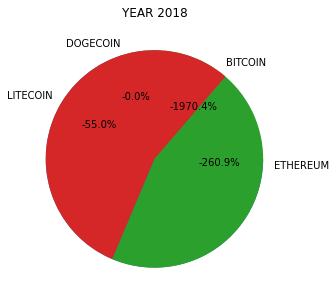

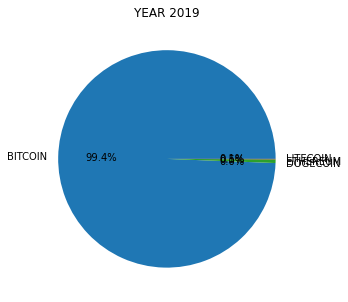

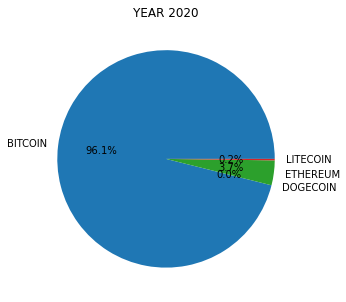

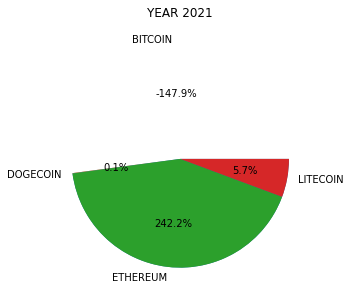

In [39]:

label = ['BITCOIN', 'DOGECOIN', 'ETHEREUM', 'LITECOIN']
plt.figure(figsize = (5, 5))
plt.pie(slope2013, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2013')

plt.figure(figsize = (5, 5))
plt.pie(slope2014, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2014')

plt.figure(figsize = (5, 5))
plt.pie(slope2015, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2015')


plt.figure(figsize = (5, 5))
plt.pie(slope2016, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2016')

plt.figure(figsize = (5, 5))
plt.pie(slope2017, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2017')


plt.figure(figsize = (5, 5))
plt.pie(slope2018, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2018')

plt.figure(figsize = (5, 5))
plt.pie(slope2019, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2019')

plt.figure(figsize = (5, 5))
plt.pie(slope2020, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2020')

plt.figure(figsize = (5, 5))
plt.pie(slope2021, labels = label, autopct = '%1.1f%%')
plt.title('YEAR 2021')









plt.show()


*These pie charts just show which crypto had the biggest slope (best avearge return over a year) and whenever it is clear that means we had a pretty big loser.*

*Finally, now that we have some knowledge on the history of these cryptos, from our data we can find derive what specifically to look for in our investment. The 2 big things I care about whenever I invest are the following:*

*Return - How much money I make on my investment*

*Risk - How much am I willing to lose based on my return*

*These two are just what I think are the two most important factors, of course, there are others like liquidity, growth, stability, initial investment, debt, and many more but the 2 Rs I think cover everything important for our purposes. However, here is a great [resource](https://www.thebalance.com/what-is-a-good-investment-2388572) going over what makes a good investment* 

*Now, in crypto, because we are analyzing Robinhood which allows us to buy part of a coin and sell whenever, we will not be accounting for all factors. But for our return, we need to see when to buy and sell to make the most amount of money. I prefer being in stocks/crypto for a short period trying to capitalize on the gains and get out before the losses. This method has its flaws caused by human nature such as greed and the inability to see the big picture.*

*An example of this is my day trading activities of crypto more specifically DOGECOIN. I was making a return of 1-2 percent weekly if not more, however, when doge dropped, my greed said I cannot take a loss and decided to hold even though the risk was high. This caused me to lose a lot of what I made day trading losing a total of 30% before I finally got out.  I consider this to be an incredibly valuable lesson and from what we learned, I try and avoid similar situations.*

*So, how will we get rid of the human nature aspect? Simple, get rid of the humans! This code can run day and night and with minor modifications do the trading for you! In fact, most trading activity is done by computers (seen here), so let the best algorithm win!*

*We can help our algorithm be the best by seeing what makes other strategies successful. The most common way others use is by plotting the relative strength (RSI), simple moving average (SMA), and the exponential moving average (EMA). The RSI will help with risk and the EMA will help us gauge the gains. Let's make our own versions of each and put a little bit of a Rizwani twist on them!*

*We will be optimizing our algorithms using the year 2020 and applying it for the year 2021.*

*Let's do this for Bitcoin and try to find the optimal period to find the averages for 2020.*

In [40]:
bitcoinpercentgain = [0,0,0,0,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

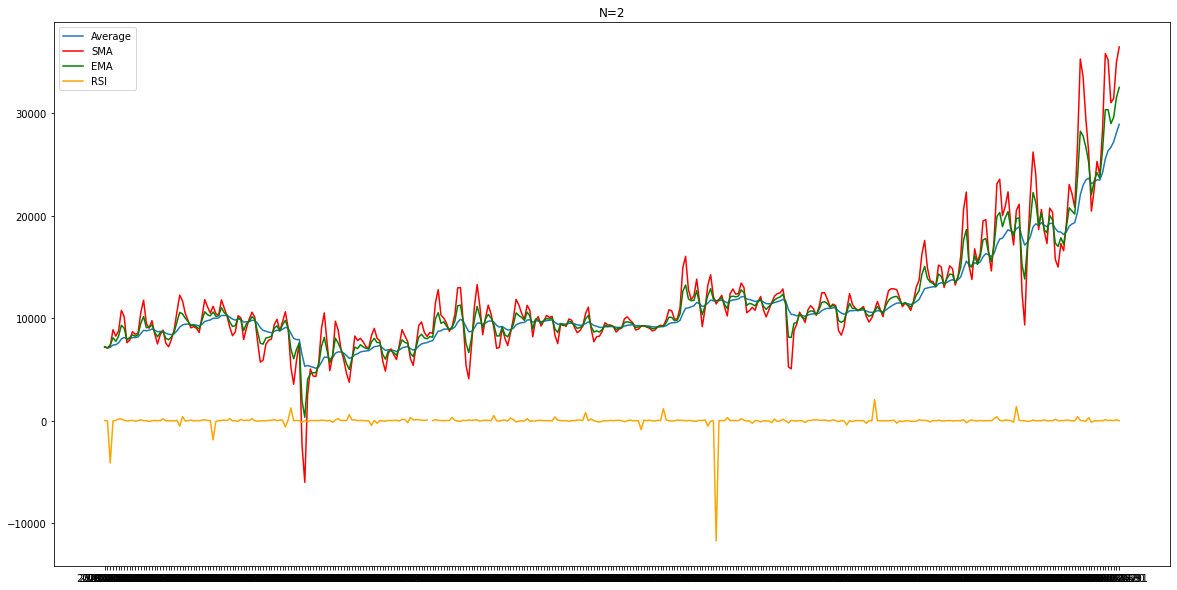

END CASH
1011514.169984829
MY PERCENT GAIN
911.5141699848291
DOING NOTHING GAIN
24.88631865903136


In [41]:

#2
n=2
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=2')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[0] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)


From this we can see that the red and green lines are great indicators of when to buy and sell. The RSI however is not that good so we will not be doing this any more.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

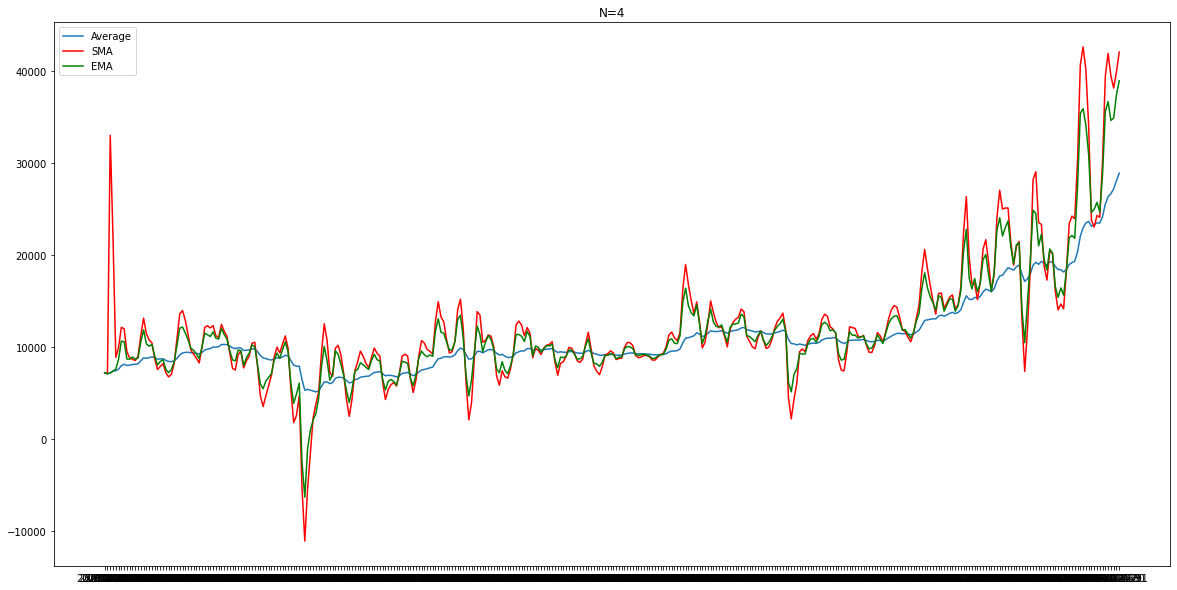

END CASH
716128.8775377702
MY PERCENT GAIN
616.1288775377702
DOING NOTHING GAIN
24.88631865903136


In [42]:

#4
n=4
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=4')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[1] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

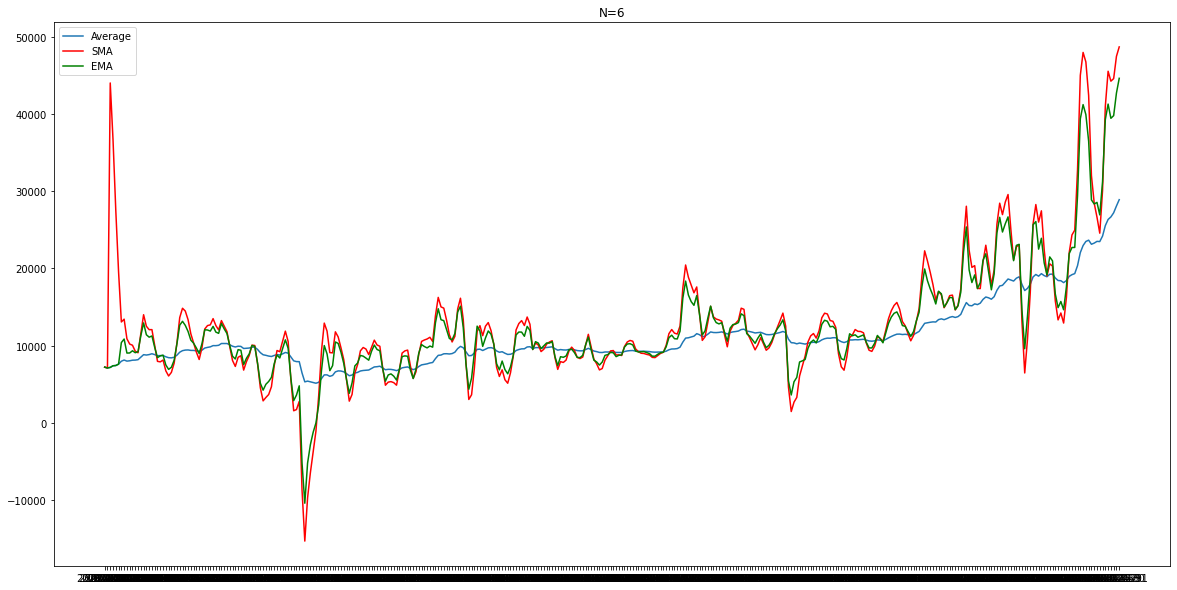

END CASH
554830.4635240628
MY PERCENT GAIN
454.8304635240628
DOING NOTHING GAIN
24.88631865903136


In [43]:

#6
n=6
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=6')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[2] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

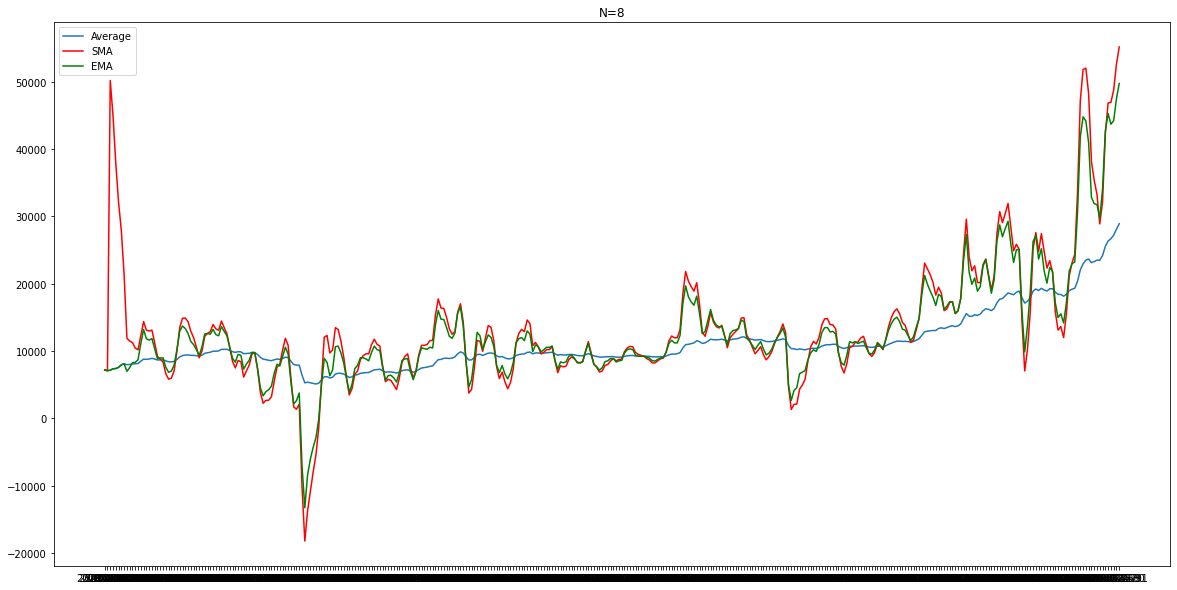

END CASH
503803.68326138565
MY PERCENT GAIN
403.8036832613857
DOING NOTHING GAIN
24.88631865903136


In [44]:

#8
n=8
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=8')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[3] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

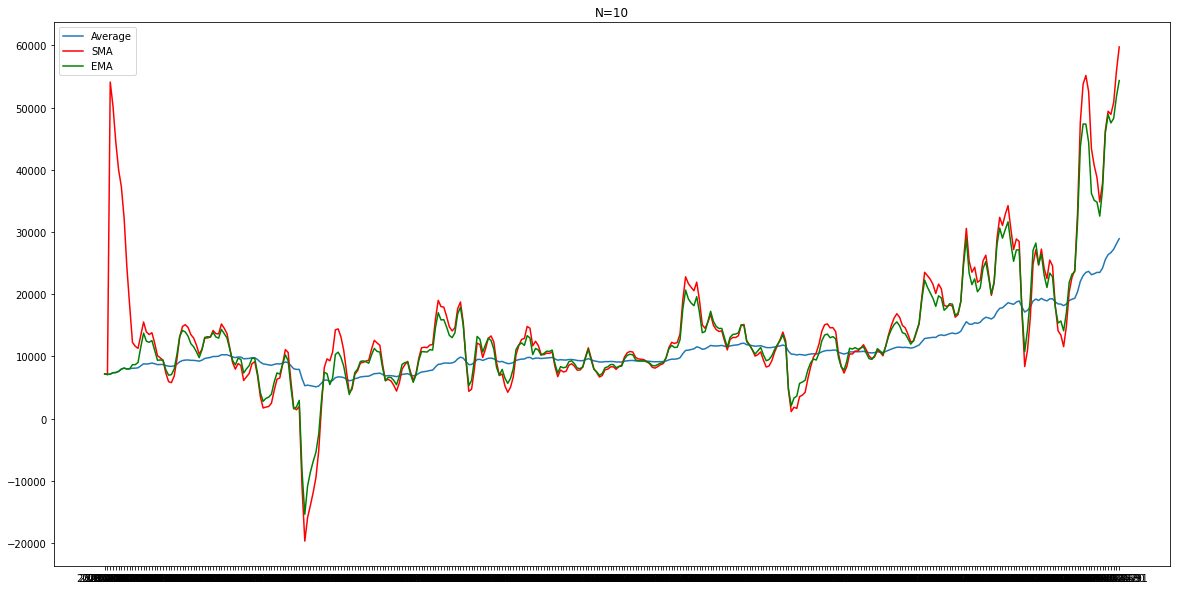

END CASH
474658.5837148543
MY PERCENT GAIN
374.65858371485433
DOING NOTHING GAIN
24.88631865903136


In [45]:

#10
n=10
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=10')
plt.legend()
plt.show()


#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[4] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

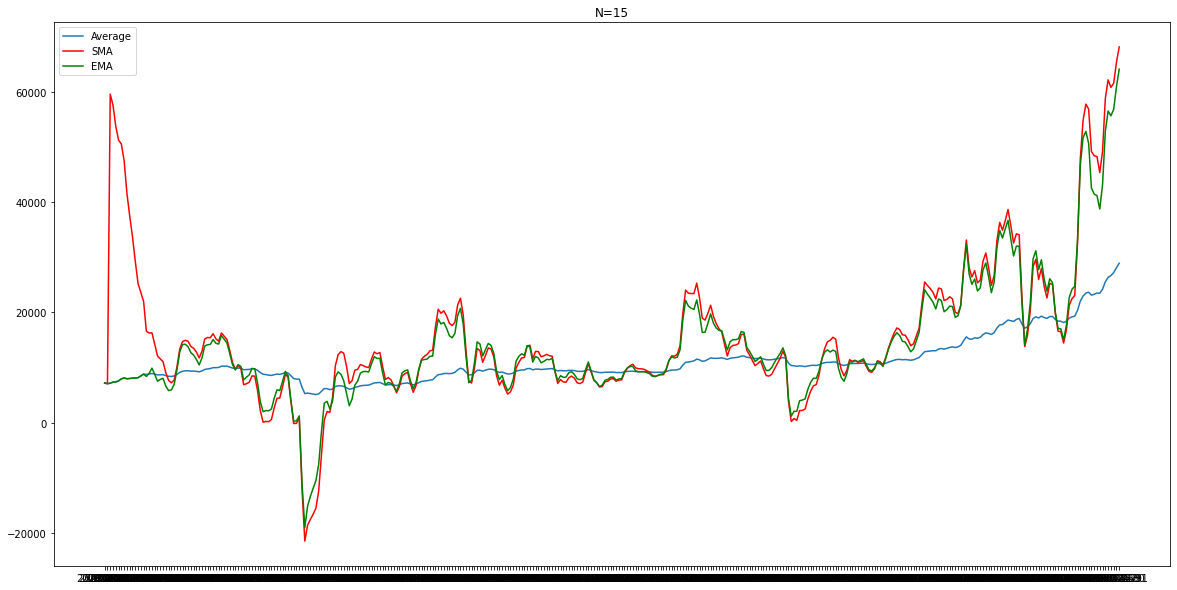

END CASH
399262.4766891729
MY PERCENT GAIN
299.2624766891729
DOING NOTHING GAIN
24.88631865903136


In [46]:

#15
n=15
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=15')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

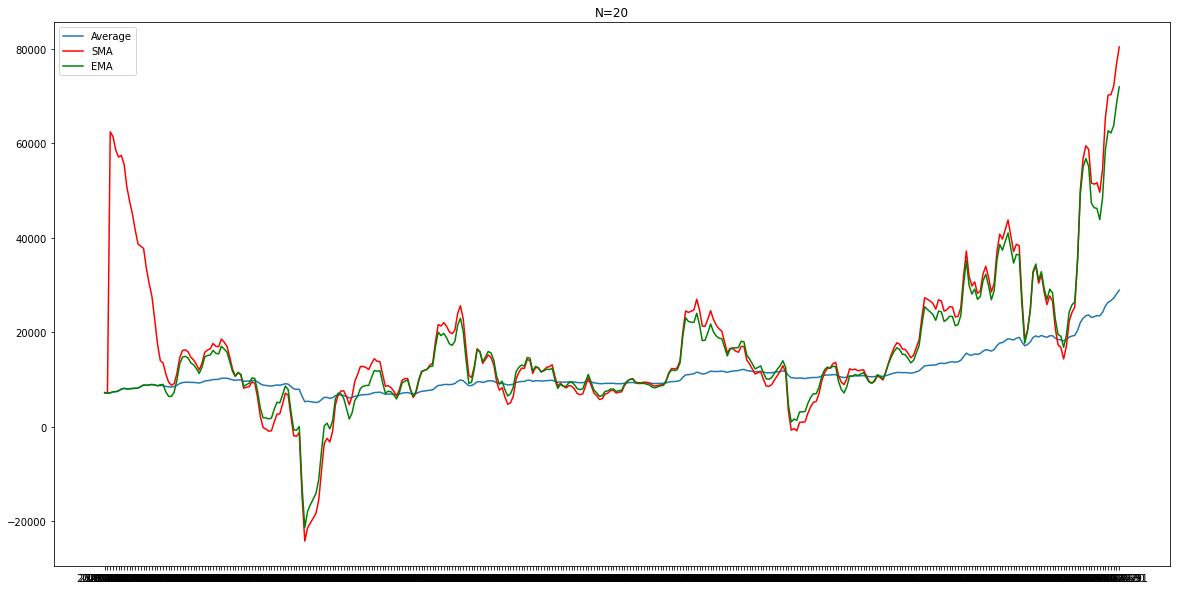

END CASH
401902.0077181756
MY PERCENT GAIN
301.9020077181756
DOING NOTHING GAIN
24.88631865903136


In [47]:

#20
n=20
sum = 0
index = 0
plt.figure(figsize = (20, 10))

#SMA
BTC_2020['SMA'] = BTC_2020['Average']

for jeff in BTC_2020['SMA'].iteritems():
  if (index < n):
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
  else:
    BTC_2020['SMA'][index] = (BTC_2020['SMA'][index] + sum)/(n+1)
    sum = sum + BTC_2020['Average'][index]
    sum = sum - BTC_2020['Average'][index-n]
  index += 1

#EMA
k = 2/(n+1)
index = 0
BTC_2020['EMA'] = BTC_2020['SMA']
for jeff in BTC_2020['EMA'].iteritems():
  if (index < n):
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index])
  else:
    BTC_2020['EMA'][index] = (BTC_2020['Average'][index]*k) + (BTC_2020['EMA'][index-1]*(1-k))
  index += 1


#to visually spread out the lines
BTC_2020['SMACHANGE'] = (BTC_2020['Average'] - BTC_2020['SMA'])*10+ BTC_2020['SMA']
BTC_2020['EMACHANGE'] = (BTC_2020['Average'] - BTC_2020['EMA'])*10+ BTC_2020['EMA']

BTC_2020['SMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['SMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['EMACHANGE'][0] = BTC_2020['Average'][0]
BTC_2020['EMACHANGE'][1] = BTC_2020['Average'][1]
BTC_2020['SMA'][0] = BTC_2020['Average'][0]
BTC_2020['SMA'][1] = BTC_2020['Average'][1]
BTC_2020['EMA'][0] = BTC_2020['Average'][0]
BTC_2020['EMA'][1] = BTC_2020['Average'][1]


#RSI
#BTC_2020['RSI'] = (100-(100/(1+((BTC_2020['Average']-BTC_2020['High'])/(BTC_2020['Average']-BTC_2020['Low'])))))/10

plt.plot(BTC_2020['Date'], BTC_2020['Average'], label = 'Average')
plt.plot(BTC_2020['Date'], BTC_2020['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(BTC_2020['Date'], BTC_2020['EMACHANGE'], color ='green', label = 'EMA')
#plt.plot(BTC_2020['Date'], BTC_2020['RSI'], color ='orange', label = 'RSI')
plt.title('N=20')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in BTC_2020['Average'].iteritems():
  if (BTC_2020['EMACHANGE'][index] > BTC_2020['Average'][index]): #BUY
    crypto = crypto + (bank/BTC_2020['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*BTC_2020['Average'][index])
    crypto = 0
  
  index += 1

bank = bank + (crypto*BTC_2020['Average'][index-1])
crypto = 0

print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(BTC_2020['Average'][0]/BTC_2020['Average'][index-1]*100)

***I am in shock. The Gains are unbelievable...***

*From all of these plots, we can see how the n (period) affects when our indicators go off. I would also like to remind you that the red and green values are predictive, they see NOTHING from the future or present, it shows the power of machine learning!*

*From what we can see, with my personal style of trading, I would buy do the n=2 trading strategy.*

*Let's do this without graphs for the rest and see if there is a better crypto!*

In [48]:
#DOGECOIN
dogecoinpercentgain = [0,0,0,0,0]

narray = [2,4,6,8,10]
arrindex = 0
for n in narray:

  sum = 0
  index = 0
  #SMA
  DOGE_2020['SMA'] = DOGE_2020['Average']
  for jeff in DOGE_2020['SMA'].iteritems():
    if (index < n):
      DOGE_2020['SMA'][index] = (DOGE_2020['SMA'][index] + sum)/(n+1)
      sum = sum + DOGE_2020['Average'][index]
    else:
      DOGE_2020['SMA'][index] = (DOGE_2020['SMA'][index] + sum)/(n+1)
      sum = sum + DOGE_2020['Average'][index]
      sum = sum - DOGE_2020['Average'][index-n]
    index += 1
  #EMA
  k = 2/(n+1)
  index = 0
  DOGE_2020['EMA'] = DOGE_2020['SMA']
  for jeff in DOGE_2020['EMA'].iteritems():
    if (index < n):
      DOGE_2020['EMA'][index] = (DOGE_2020['Average'][index])
    else:
      DOGE_2020['EMA'][index] = (DOGE_2020['Average'][index]*k) + (DOGE_2020['EMA'][index-1]*(1-k))
    index += 1
  #to visually spread out the lines
  DOGE_2020['SMACHANGE'] = (DOGE_2020['Average'] - DOGE_2020['SMA'])*10+ DOGE_2020['SMA']
  DOGE_2020['EMACHANGE'] = (DOGE_2020['Average'] - DOGE_2020['EMA'])*10+ DOGE_2020['EMA']
  
  DOGE_2020['SMACHANGE'][0] = DOGE_2020['Average'][0]
  DOGE_2020['SMACHANGE'][1] = DOGE_2020['Average'][1]
  DOGE_2020['EMACHANGE'][0] = DOGE_2020['Average'][0]
  DOGE_2020['EMACHANGE'][1] = DOGE_2020['Average'][1]
  DOGE_2020['SMA'][0] = DOGE_2020['Average'][0]
  DOGE_2020['SMA'][1] = DOGE_2020['Average'][1]
  DOGE_2020['EMA'][0] = DOGE_2020['Average'][0]
  DOGE_2020['EMA'][1] = DOGE_2020['Average'][1]
  #profit starting with 100k
  index = 0
  bank = 100000
  crypto = 0
  for jeff in DOGE_2020['Average'].iteritems():
    if (DOGE_2020['EMACHANGE'][index] > DOGE_2020['Average'][index]): #BUY
      crypto = crypto + (bank/DOGE_2020['Average'][index])
      bank = 0
    else: #SELL
      bank = bank + (crypto*DOGE_2020['Average'][index])
      crypto = 0
    index += 1
  bank = bank + (crypto*DOGE_2020['Average'][index-1])
  crypto = 0
  
  dogecoinpercentgain[arrindex] = (((bank-100000)/100000)*100)
  arrindex +=1

print(dogecoinpercentgain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying t

[605.9481553344924, 403.89183563990673, 281.4464032288738, 290.8582946276717, 231.71754339745289]


In [49]:
#ETHEREUM
ethereumpercentgain = [0,0,0,0,0]
 
narray = [2,4,6,8,10]
arrindex = 0
for n in narray:
 
 sum = 0
 index = 0
 #SMA
 ETH_2020['SMA'] = ETH_2020['Average']
 for jeff in ETH_2020['SMA'].iteritems():
   if (index < n):
     ETH_2020['SMA'][index] = (ETH_2020['SMA'][index] + sum)/(n+1)
     sum = sum + ETH_2020['Average'][index]
   else:
     ETH_2020['SMA'][index] = (ETH_2020['SMA'][index] + sum)/(n+1)
     sum = sum + ETH_2020['Average'][index]
     sum = sum - ETH_2020['Average'][index-n]
   index += 1
 #EMA
 k = 2/(n+1)
 index = 0
 ETH_2020['EMA'] = ETH_2020['SMA']
 for jeff in ETH_2020['EMA'].iteritems():
   if (index < n):
     ETH_2020['EMA'][index] = (ETH_2020['Average'][index])
   else:
     ETH_2020['EMA'][index] = (ETH_2020['Average'][index]*k) + (ETH_2020['EMA'][index-1]*(1-k))
   index += 1
 #to visually spread out the lines
 ETH_2020['SMACHANGE'] = (ETH_2020['Average'] - ETH_2020['SMA'])*10+ ETH_2020['SMA']
 ETH_2020['EMACHANGE'] = (ETH_2020['Average'] - ETH_2020['EMA'])*10+ ETH_2020['EMA']
 ETH_2020['SMACHANGE'][0] = ETH_2020['Average'][0]
 ETH_2020['SMACHANGE'][1] = ETH_2020['Average'][1]
 ETH_2020['EMACHANGE'][0] = ETH_2020['Average'][0]
 ETH_2020['EMACHANGE'][1] = ETH_2020['Average'][1]
 ETH_2020['SMA'][0] = ETH_2020['Average'][0]
 ETH_2020['SMA'][1] = ETH_2020['Average'][1]
 ETH_2020['EMA'][0] = ETH_2020['Average'][0]
 ETH_2020['EMA'][1] = ETH_2020['Average'][1]
 #profit starting with 100k
 index = 0
 bank = 100000
 crypto = 0
 for jeff in ETH_2020['Average'].iteritems():
   if (ETH_2020['EMACHANGE'][index] > ETH_2020['Average'][index]): #BUY
     crypto = crypto + (bank/ETH_2020['Average'][index])
     bank = 0
   else: #SELL
     bank = bank + (crypto*ETH_2020['Average'][index])
     crypto = 0
   index += 1
 bank = bank + (crypto*ETH_2020['Average'][index-1])
 crypto = 0
 ethereumpercentgain[arrindex] = (((bank-100000)/100000)*100)
 arrindex +=1
 
print(ethereumpercentgain)
 
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying t

[1434.1491236352401, 966.921475465583, 656.4060024407686, 770.5922429248238, 693.422185942041]


In [50]:
#LITECOIN
litecoinpercentgain = [0,0,0,0,0]
 
narray = [2,4,6,8,10]
arrindex = 0
for n in narray:
 
 sum = 0
 index = 0
 #SMA
 LTC_2020['SMA'] = LTC_2020['Average']
 for jeff in LTC_2020['SMA'].iteritems():
   if (index < n):
     LTC_2020['SMA'][index] = (LTC_2020['SMA'][index] + sum)/(n+1)
     sum = sum + LTC_2020['Average'][index]
   else:
     LTC_2020['SMA'][index] = (LTC_2020['SMA'][index] + sum)/(n+1)
     sum = sum + LTC_2020['Average'][index]
     sum = sum - LTC_2020['Average'][index-n]
   index += 1
 #EMA
 k = 2/(n+1)
 index = 0
 LTC_2020['EMA'] = LTC_2020['SMA']
 for jeff in LTC_2020['EMA'].iteritems():
   if (index < n):
     LTC_2020['EMA'][index] = (LTC_2020['Average'][index])
   else:
     LTC_2020['EMA'][index] = (LTC_2020['Average'][index]*k) + (LTC_2020['EMA'][index-1]*(1-k))
   index += 1
 #to visually spread out the lines
 LTC_2020['SMACHANGE'] = (LTC_2020['Average'] - LTC_2020['SMA'])*10+ LTC_2020['SMA']
 LTC_2020['EMACHANGE'] = (LTC_2020['Average'] - LTC_2020['EMA'])*10+ LTC_2020['EMA']
 LTC_2020['SMACHANGE'][0] = LTC_2020['Average'][0]
 LTC_2020['SMACHANGE'][1] = LTC_2020['Average'][1]
 LTC_2020['EMACHANGE'][0] = LTC_2020['Average'][0]
 LTC_2020['EMACHANGE'][1] = LTC_2020['Average'][1]
 LTC_2020['SMA'][0] = LTC_2020['Average'][0]
 LTC_2020['SMA'][1] = LTC_2020['Average'][1]
 LTC_2020['EMA'][0] = LTC_2020['Average'][0]
 LTC_2020['EMA'][1] = LTC_2020['Average'][1]
 #profit starting with 100k
 index = 0
 bank = 100000
 crypto = 0
 for jeff in LTC_2020['Average'].iteritems():
   if (LTC_2020['EMACHANGE'][index] > LTC_2020['Average'][index]): #BUY
     crypto = crypto + (bank/LTC_2020['Average'][index])
     bank = 0
   else: #SELL
     bank = bank + (crypto*LTC_2020['Average'][index])
     crypto = 0
   index += 1
 bank = bank + (crypto*LTC_2020['Average'][index-1])
 crypto = 0
 litecoinpercentgain[arrindex] = (((bank-100000)/100000)*100)
 arrindex +=1
 
print(litecoinpercentgain)
 
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying t

[1054.8019326325482, 801.3745239889624, 317.03415258540474, 350.2369733213242, 313.84877575753063]


Text(0.5, 1.0, 'N=10')

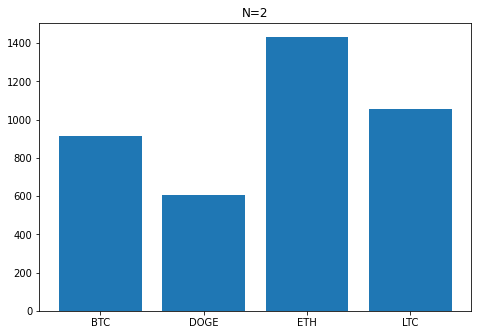

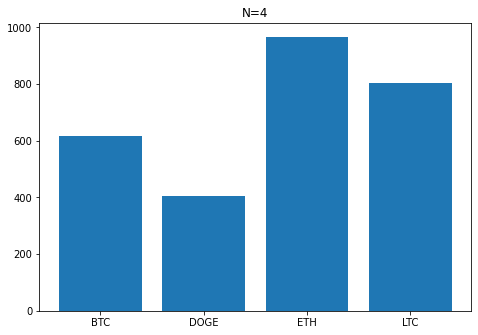

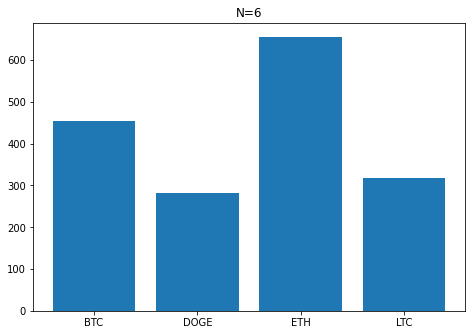

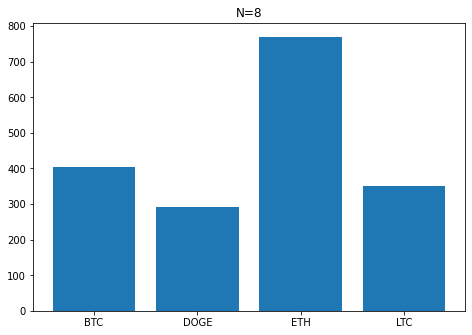

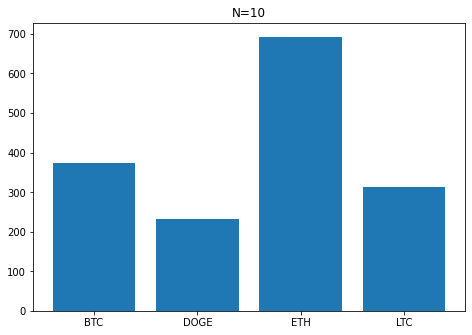

In [51]:
data = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

narray = [0,1,2,3,4]
for n in narray:
 data[0][n] = bitcoinpercentgain[n]
 data[1][n] = dogecoinpercentgain[n]
 data[2][n] = ethereumpercentgain[n]
 data[3][n] = litecoinpercentgain[n]

percentgain = pd.DataFrame(data, columns = ['2', '4','6','8','10'])
 
#2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['BTC','DOGE','ETH','LTC']
ax.bar(labels,percentgain['2'])
plt.title('N=2')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,percentgain['4'])
plt.title('N=4')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,percentgain['6'])
plt.title('N=6')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,percentgain['8'])
plt.title('N=8')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,percentgain['10'])
plt.title('N=10')

 


*Here's a visual of the percent return based on our trading strategies. We can see how the period and each different coin affects our percent return. Based on this we can choose a coin to purse and trade for the year 2021!*

*Now, based on this, for the year 2021, I would choose to invest in Ethereum which is surprising as I have still never invested in it nor considered it. Now, I would like to analyze my method versus the built-in linear regression that we did at the beginning except for a very small period of time.*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: S

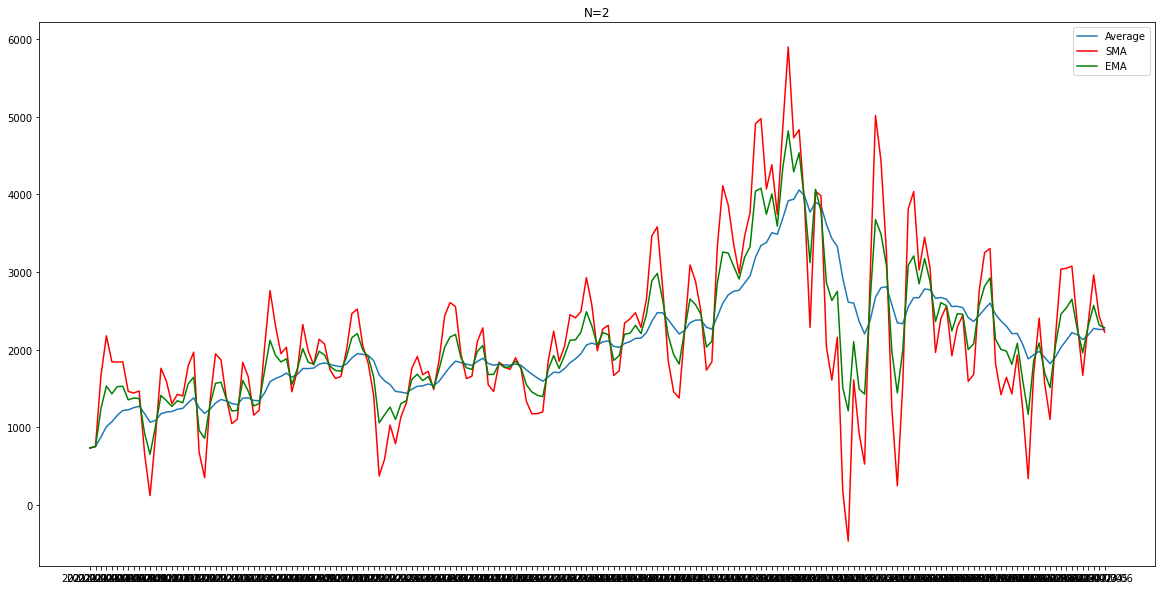

END CASH
645907.0295059882
MY PERCENT GAIN
545.9070295059882
DOING NOTHING GAIN
32.46089252306625


In [52]:
 
#My Method for Year 2021 (with machine learning)
n=2
sum = 0
index = 0
plt.figure(figsize = (20, 10))
 
#SMA
ETH_2021['SMA'] = ETH_2021['Average']
 
for jeff in ETH_2021['SMA'].iteritems():
  if (index < n):
    ETH_2021['SMA'][index] = (ETH_2021['SMA'][index] + sum)/(n+1)
    sum = sum + ETH_2021['Average'][index]
  else:
    ETH_2021['SMA'][index] = (ETH_2021['SMA'][index] + sum)/(n+1)
    sum = sum + ETH_2021['Average'][index]
    sum = sum - ETH_2021['Average'][index-n]
  index += 1
 
#EMA
k = 2/(n+1)
index = 0
ETH_2021['EMA'] = ETH_2021['SMA']
for jeff in ETH_2021['EMA'].iteritems():
  if (index < n):
    ETH_2021['EMA'][index] = (ETH_2021['Average'][index])
  else:
    ETH_2021['EMA'][index] = (ETH_2021['Average'][index]*k) + (ETH_2021['EMA'][index-1]*(1-k))
  index += 1
 
 
#to visually spread out the lines (And a little bit of modification)
ETH_2021['SMACHANGE'] = (ETH_2021['Average'] - ETH_2021['SMA'])*10+ ETH_2021['SMA']
ETH_2021['EMACHANGE'] = (ETH_2021['Average'] - ETH_2021['EMA'])*10+ ETH_2021['EMA']
 
ETH_2021['SMACHANGE'][0] = ETH_2021['Average'][0]
ETH_2021['SMACHANGE'][1] = ETH_2021['Average'][1]
ETH_2021['EMACHANGE'][0] = ETH_2021['Average'][0]
ETH_2021['EMACHANGE'][1] = ETH_2021['Average'][1]
ETH_2021['SMA'][0] = ETH_2021['Average'][0]
ETH_2021['SMA'][1] = ETH_2021['Average'][1]
ETH_2021['EMA'][0] = ETH_2021['Average'][0]
ETH_2021['EMA'][1] = ETH_2021['Average'][1]
 
 
plt.plot(ETH_2021['Date'], ETH_2021['Average'], label = 'Average')
plt.plot(ETH_2021['Date'], ETH_2021['SMACHANGE'], color ='red', label = 'SMA')
plt.plot(ETH_2021['Date'], ETH_2021['EMACHANGE'], color ='green', label = 'EMA')
plt.title('N=2')
plt.legend()
plt.show()
 
#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in ETH_2021['Average'].iteritems():
  if (ETH_2021['EMACHANGE'][index] > ETH_2021['Average'][index]): #BUY
    crypto = crypto + (bank/ETH_2021['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*ETH_2021['Average'][index])
    crypto = 0
  index += 1
 
bank = bank + (crypto*ETH_2021['Average'][index-1])
crypto = 0
 
print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[0] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(ETH_2021['Average'][0]/ETH_2021['Average'][index-1]*100)
 
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


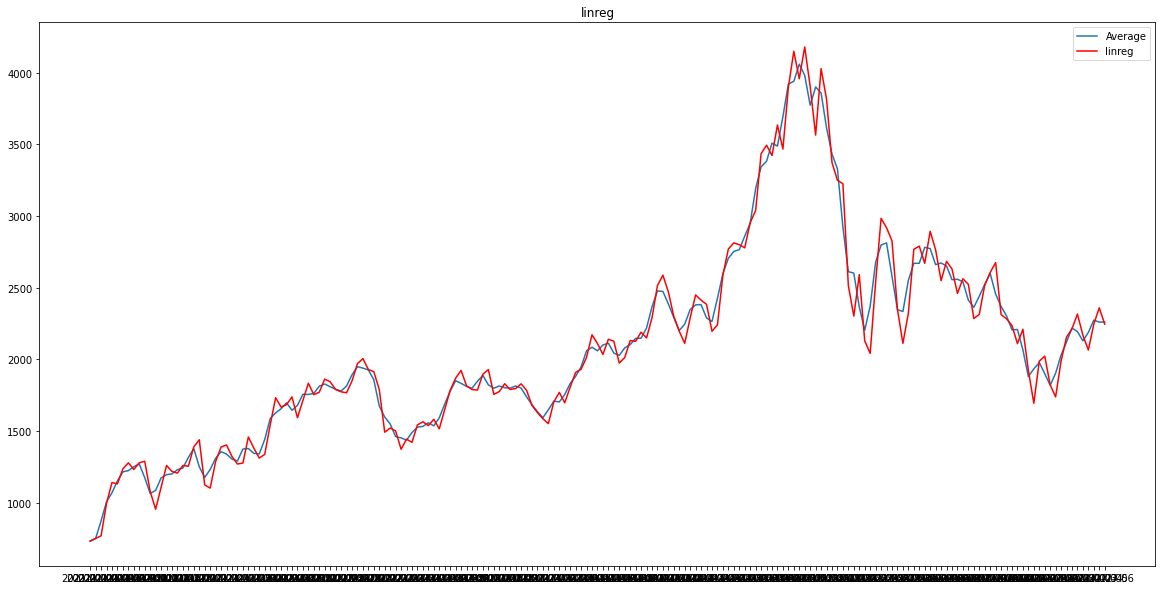

END CASH
38827.164967841345
MY PERCENT GAIN
-61.17283503215866
DOING NOTHING GAIN
32.46089252306625


In [53]:
# Lin reg method
n=2
index = 0
plt.figure(figsize = (20, 10))

X_train=[0,1]
Y_train=[(ETH_2021['Average'][0]),(ETH_2021['Average'][1])]


ETH_2021['linreg'] = ETH_2021['Average']
 
for jeff in ETH_2021['linreg'].iteritems():
  if (index < n):
    index += 1
  else:
    m,b = np.polyfit(X_train, Y_train, 1)
    Y_pred = index*m + b

    ETH_2021['linreg'][index] = Y_pred
    Y_train[0]=Y_train[1]
    Y_train[1]=ETH_2021['Average'][index]
    X_train[0]=X_train[0]+1
    X_train[1]=X_train[1]+1
    index += 1


plt.plot(ETH_2021['Date'], ETH_2021['Average'], label = 'Average')
plt.plot(ETH_2021['Date'], ETH_2021['linreg'], color ='red', label = 'linreg')
plt.title('linreg')
plt.legend()
plt.show()

#profit starting with 100k
index = 0
bank = 100000
crypto = 0
for jeff in ETH_2021['Average'].iteritems():
  if (ETH_2021['linreg'][index] > ETH_2021['Average'][index]): #BUY
    crypto = crypto + (bank/ETH_2021['Average'][index])
    bank = 0
  else: #SELL
    bank = bank + (crypto*ETH_2021['Average'][index])
    crypto = 0
  index += 1
 
bank = bank + (crypto*ETH_2021['Average'][index-1])
crypto = 0
 
print("END CASH")
print(bank)
print("MY PERCENT GAIN")
print(((bank-100000)/100000)*100)
bitcoinpercentgain[0] = (((bank-100000)/100000)*100)
print("DOING NOTHING GAIN")
print(ETH_2021['Average'][0]/ETH_2021['Average'][index-1]*100)
 
 

*We can now see how incredible the method that we derived is. It is better than linear regression and I would go ahead and pursue my method. In fact,  I will actually tie my Robinhood account to this program and have it invest my money in the near future hopefully capitalizing on my gains.*

In [54]:
#Lets see if random forests help

#x = ETH_2021[['Marketcap','RSI','linreg']]
#x['yesterdayLow'] = ETH_2021['Low'].shift(-1)
#x['yesterdayOpen'] = ETH_2021['Open'].shift(-1)
#x['yesterdayClose'] = ETH_2021['Close'].shift(-1)
#x['yesterdayHigh'] = ETH_2021['High'].shift(-1)
#x['yesterdayAve'] = ETH_2021['Average'].shift(-1)

#y = ETH_2021[['Average']]

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70%

#forest_sqrt = RandomForestClassifier (n_estimators=100)
#cross = cross_val_score(forest_sqrt, X_train, y_train, cv=10)
#print(cross.mean())



#***Conclusion***#

*All in all, we were able to use machine learning, our complex algorithms, and math to derive an excellent trading strategy.*

*We can verify our model/predictions by comparing our algorithm against what the cryptocurrency would have done if I were to invest the same amount of money at the beginning of the year and cashed out at the end (base case).*


*Let's verify with our 'bank' which starts the year with 100k and executes theoretical trades WITHOUT knowing the future. In my opinion, for me to deem an algorithm successful it should beat the base case by a couple of percents.*

*However, for an algorithm to be very successful and lucrative, I would say it should outperform the base case 3 fold. Now, with the base case for the data we have so far for 2021 we would need to have a gain of about 100 percent as the base is 30 percent. Our method using machine learning and data analysis did... Drumroll Please...  550 percent! 
IT'S INCREDIBLE!*


*So the takeaway message is [machine learning and algorithms](https://www.economist.com/briefing/2019/10/05/the-stockmarket-is-now-run-by-computers-algorithms-and-passive-managers) can help us capitalize on the cryptocurrency market, stock market, and even forex. This is why the majority of the trades are done by machine, they are way better at it then we are. This is important because like baseball teams using data science to maximize their profits and players abilites, we can use data science to maximize our profits in the cryptocurrency market and even the stock market!*

In [55]:
#Convert to HTML
#!jupyter nbconvert --to html /content/Analysis_of_Popular_Cryptocurrencies.ipynb